# Data Prep

In [18]:
import pandas as pd
import numpy as np
import random
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering
from sklearn.metrics.cluster import adjusted_rand_score, rand_score

random.seed(42)

df = pd.read_csv("data.csv")
df

author                                             prompt  \
0     reddit  Killing Hitler has become a sport amongst time...   
1     reddit  Killing Hitler has become a sport amongst time...   
2     reddit  Killing Hitler has become a sport amongst time...   
3     reddit  Killing Hitler has become a sport amongst time...   
4     reddit  Killing Hitler has become a sport amongst time...   
...      ...                                                ...   
6195  gemini  To get in Heaven, you have to confront the per...   
6196  gemini  To get in Heaven, you have to confront the per...   
6197  gemini  To get in Heaven, you have to confront the per...   
6198  gemini  To get in Heaven, you have to confront the per...   
6199  gemini  To get in Heaven, you have to confront the per...   

                                               response  \
0     * Magnificient work ! Truly inspiring ! * Hein...   
1     Even by my standards this one took some work ....   
2     So , we can now time travel into the future . ...   
3     Dear POTUS , The future is amazing . After pea...   
4     When doing this kind of stuff , it 's good to ...   
...                                                 ...   
6195  In the hushed tranquility of the celestial rea...   
6196  As I arrived at the pearly gates of Heaven , m...   
6197  In the ethereal realm , where clouds caressed ...   
6198  In the ethereal realm of the afterlife , I sto...   
6199  In the vast expanse of the afterlife , I found...   

                                                   bert  \
0     [-0.006725453305989504, 0.23576399683952332, -...   
1     [0.07968071103096008, -0.020308567211031914, 0...   
2     [-0.12700289487838745, 0.3927253186702728, -0....   
3     [0.3432272970676422, -0.2167324721813202, 0.15...   
4     [-0.2912406027317047, 0.12030187994241714, 0.0...   
...                                                 ...   
6195  [-0.16426882147789001, 0.16457293927669525, -0...   
6196  [-0.11653857678174973, 0.3063790202140808, -0....   
6197  [-0.1640430986881256, 0.024861453101038933, -0...   
6198  [-0.22200319170951843, 0.1660720556974411, -0....   
6199  [-0.17946678400039673, 0.16679276525974274, -0...   

                                                roberta  \
0     [-0.04180792719125748, 0.040072135627269745, -...   
1     [-0.02620106004178524, 0.02632817253470421, -0...   
2     [-0.04244694486260414, 0.010937012732028961, -...   
3     [-0.025556232780218124, 0.06068963184952736, -...   
4     [-0.029593346640467644, 0.066276416182518, -0....   
...                                                 ...   
6195  [-0.016211245208978653, 0.06866081804037094, -...   
6196  [-0.025263268500566483, 0.057814307510852814, ...   
6197  [-0.024055898189544678, 0.08036021888256073, -...   
6198  [-0.032017629593610764, 0.0817214846611023, -0...   
6199  [-0.03646324574947357, 0.08845417946577072, -0...   

                                                    opt  \
0     [-0.7724277377128601, -1.4468441009521484, -3....   
1     [-0.11295819282531738, -1.027052640914917, -2....   
2     [-5.222697734832764, -2.8652701377868652, -3.3...   
3     [2.4253904819488525, -4.577791690826416, -3.37...   
4     [-1.9841090440750122, 0.004299342632293701, -2...   
...                                                 ...   
6195  [-1.8663527965545654, -3.4808688163757324, -2....   
6196  [-0.4610805809497833, -4.71753454208374, -3.81...   
6197  [-0.8870304822921753, -4.3331685066223145, 0.1...   
6198  [-2.0494422912597656, -2.7628235816955566, -3....   
6199  [-2.2711148262023926, -5.962841987609863, 0.06...   

                                                  llama  \
0     [2.265625, 0.82666015625, 0.69775390625, 0.782...   
1     [0.9736328125, -2.439453125, 1.4921875, -0.757...   
2     [0.06005859375, -1.708984375, -0.457275390625,...   
3     [1.6201171875, -3.439453125, -1.546875, -1.0, ...   
4     [0.305908203125, 1.208984375, 3.591796875, -0....   
...        

In [13]:
def subset(df, authors):
    max_samples = min(df["author"].value_counts()[authors])
    df_authors = pd.concat(
        [df[df["author"] == author].sample(max_samples) for author in authors]
    ).reset_index(drop=True)
    return df_authors

def safe_literal_eval(x):
    try:
        return ast.literal_eval(x)
    except (ValueError, SyntaxError) as e:
        print("Error evaluating expression:", x)
        return []

def expand_df(df, vector_names):
    df_columns = []
    for column in vector_names:
        df_column = df[column].apply(safe_literal_eval).apply(pd.Series)
        df_columns.append(df_column)
    return pd.concat(df_columns, axis=1)

def standardize_cols(df):
    standardizer = StandardScaler()
    return standardizer.fit_transform(df)

def cluster_graph(authors, vector_names):
    df_authors = subset(df, authors)
    df_expanded = expand_df(df_authors, vector_names)
    print(df_expanded)
    print(df_expanded.isna().sum().sum())
    data = standardize_cols(df_expanded)
    #print(data)
    
    # PCA
    pca = PCA(n_components=25)
    data_pca = pca.fit_transform(data)
    
    # Spectral Clusters
    clusterer = SpectralClustering(n_clusters = 2, affinity = 'nearest_neighbors', gamma = 0.5)
    spectral_labels = clusterer.fit_predict(data)
    
    # KMeans
    kmeans = KMeans(n_clusters=len(authors), n_init=10)
    kmeans.fit(data)
    labels_kmeans = kmeans.labels_
    
    # Prints Rand Indexes and Adjusted Rand Indexes
    print(f"{vector_names} scores:")
    
    ari = adjusted_rand_score(df_authors["author"], labels_kmeans)
    ri = rand_score(df_authors["author"], labels_kmeans)
    print(f'KMeans Adjusted Rand Index: {ari}')
    print(f'KMeans Rand Index: {ri}')

    ari = adjusted_rand_score(df_authors["author"], spectral_labels)
    ri = rand_score(df_authors["author"], spectral_labels)
    print(f'Spectral Clustering Adjusted Rand Index: {ari}')
    print(f'Spectral Clustering Rand Index: {ri}')
    

    # Plot PCA
    plt.figure(figsize=(8, 8))
    sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=df_authors["author"], palette="viridis")
    plt.title(f"Authors: {authors}, Vectors: {vector_names} - PCA")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.legend(title="Author")
    plt.show()
    
    # PCA Elbow Plot
    plt.figure(figsize=(8, 8))
    cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
    plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
    plt.title(f"Authors: {authors}, Vectors: {vector_names} - PCA Elbow Plot")
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cumulative Explained Variance Ratio')
    plt.show()

    # Plot Spectral
    plt.figure(figsize=(8, 8))
    plt.scatter(data_pca[:, 0], data_pca[:, 1], c=spectral_labels, cmap="viridis")
    plt.title(f"Authors: {authors}, Vectors: {vector_names} - Spectral Clustering")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()
    
    # Plot KMeans
    plt.figure(figsize=(8, 8))
    plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels_kmeans, cmap="viridis")
    plt.title(f"Authors: {authors}, Vectors: {vector_names} - KMeans Clustering")
    plt.xlabel("X")
    plt.ylabel("Y")    
    plt.show()

def cluster(authors, vector_names):
    df_authors = subset(df, authors)
    df_expanded = expand_df(df_authors, vector_names)
    data = standardize_cols(df_expanded)
    
    # Spectral Clusters
    clusterer = SpectralClustering(n_clusters = 2, affinity = 'nearest_neighbors', gamma = 0.5)
    spectral_labels = clusterer.fit_predict(data)
    
    # KMeans
    kmeans = KMeans(n_clusters=len(authors), n_init=10)
    kmeans.fit(data)
    labels_kmeans = kmeans.labels_
    
    # Calculate ari and ri
    Kmeans_ari = adjusted_rand_score(df_authors["author"], labels_kmeans)
    Kmeans_ri = rand_score(df_authors["author"], labels_kmeans)
    Spectral_ari = adjusted_rand_score(df_authors["author"], spectral_labels)
    Spectral_ri = rand_score(df_authors["author"], spectral_labels)
    
    return Kmeans_ari, Kmeans_ri, Spectral_ari, Spectral_ri
    

In [3]:
def safe_literal_eval(x):
    try:
        return ast.literal_eval(x)
    except (ValueError, SyntaxError) as e:
        print("Error evaluating expression:", x)
        return []

def expand_df(df, vector_names):
    df_columns = []
    for column in vector_names:
        # Apply safe_literal_eval to handle malformed strings
        df_column = df[column].apply(safe_literal_eval).apply(pd.Series)
        df_columns.append(df_column)
    return pd.concat(df_columns, axis=1)

# Example usage
data = {'vector1': ['[1, 2, 3]', '[4, 5]', '[6]', '[7, 8]'],
        'vector2': ['[a, b]', '[c]', '[d]', '[e, f, g]']}
df = pd.DataFrame(data)

# Call the function
expanded_df = expand_df(df, ['vector1', 'vector2'])
print(expanded_df)


Error evaluating expression: [a, b]
Error evaluating expression: [c]
Error evaluating expression: [d]
Error evaluating expression: [e, f, g]
     0    1    2
0  1.0  2.0  3.0
1  4.0  5.0  NaN
2  6.0  NaN  NaN
3  7.0  8.0  NaN


In [4]:
list_of_vector_names = [["common"],
                        ["function"],
                        ["common", "function"],
                        ["bert"],
                        ["common", "function", "bert"]]

# Reddit vs. GPT (temp 1.0)

      0   1   2   3   4   5   6   7   8   9   ...  90  91  92  93  94  95  96  \
0      1   4   5   2   3   2  16   2   0   2  ...   0   0   0   0   0   0   0   
1     11   1   4  14  11   2  11   9   0   2  ...   0   0   0   0   0   0   0   
2      8   3   3   0   5   0   0   3   1   2  ...   2   0   0   0   0   1   0   
3      9  13   8   4   4   6  15   2   0   1  ...   0   0   0   1   0   0   0   
4      1   0   1   0   1   0   0   0   0   0  ...   0   0   0   0   0   0   0   
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
1595   0   1   0   0   0   0   0   1   0   1  ...   0   0   0   0   0   0   0   
1596   0   1   0   0   0   0   0   0   0   1  ...   0   0   0   0   0   0   0   
1597   2   0   0   1   0   0   0   0   0   1  ...   0   0   0   0   0   0   0   
1598   1   0   0   0   0   0   0   0   0   2  ...   0   0   0   0   0   0   0   
1599   4   0   0   2   0   1   0   0   0   1  ...   0   0   0   0   0   0   0   

      97  98  99  
0      0

/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


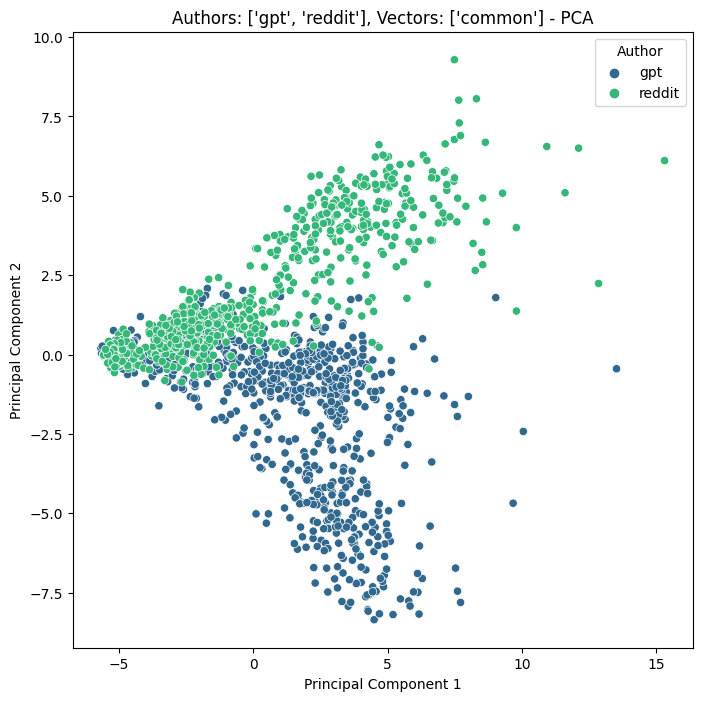

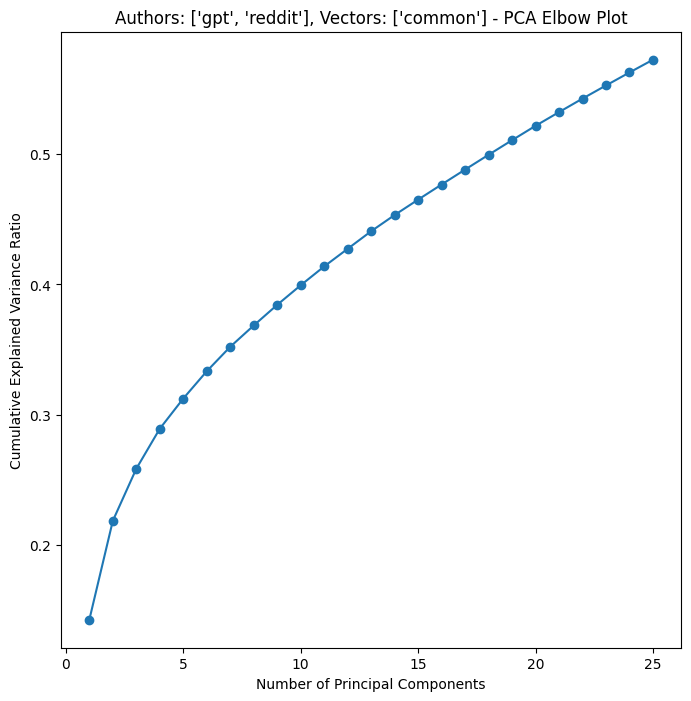

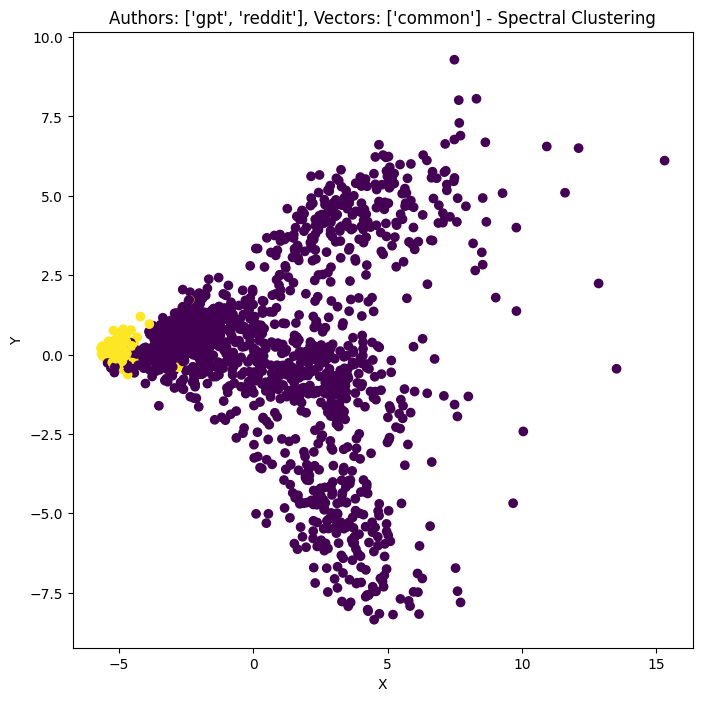

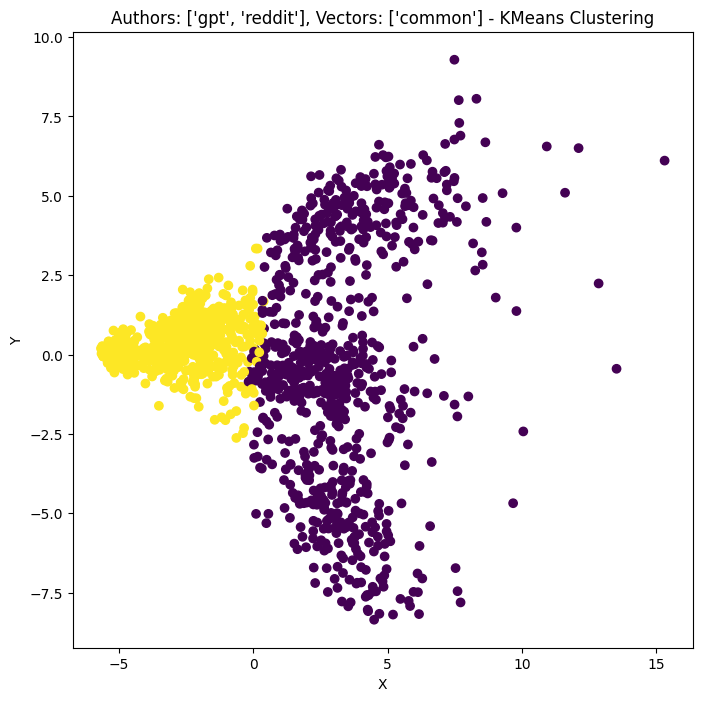



      0    1    2    3    4    5    6    7    8    9    ...  267  268  269  \
0       0    0    0    1    0    0    0    1    0    0  ...    0    0    0   
1       4    1    0    0    0    0    0    0    0    0  ...    0    2    0   
2       5    0    0    0    0    0    0    0    0    0  ...    0    1    0   
3       0    0    0    0    0    0    0    0    1    0  ...    1    0    0   
4       5    0    0    0    0    0    0    0    1    0  ...    0    2    2   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1595   12    1    0    0    0    0    0    0    0    0  ...    0    0    0   
1596   13    0    0    0    0    0    0    0    3    0  ...    0    0    0   
1597    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
1598    1    0    0    0    0    0    0    0    0    0  ...    0    0    0   
1599   10    1    0    0    0    0    0    0    1    0  ...    0    0    2   

      270  271  272  273  274  275  276  
0       0    0    0

/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


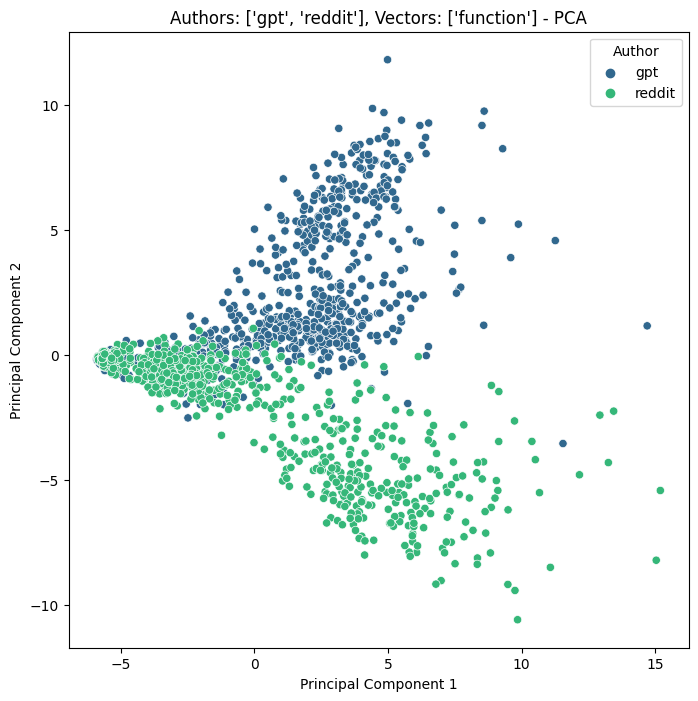

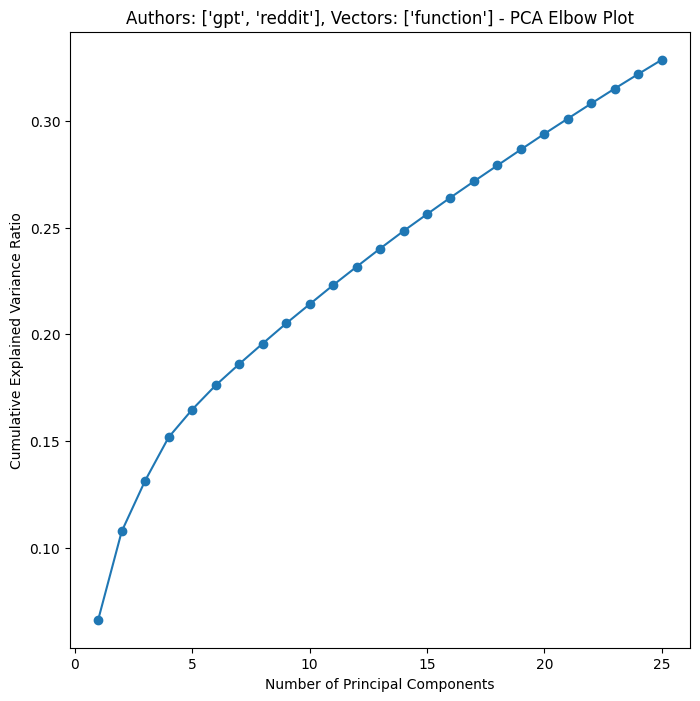

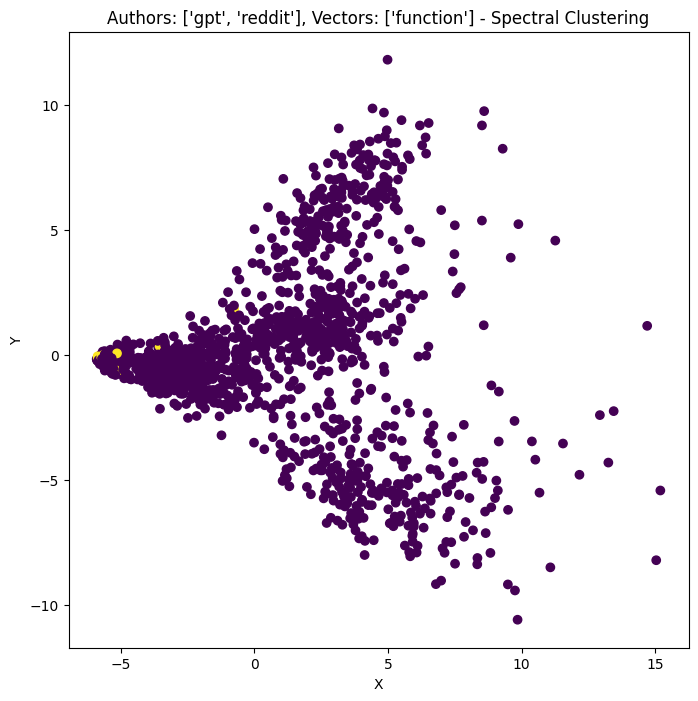

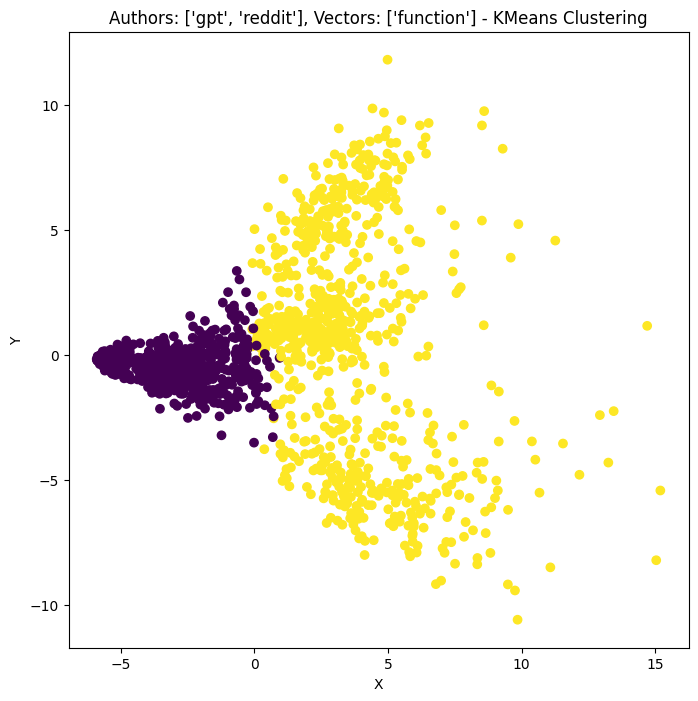



      0    1    2    3    4    5    6    7    8    9    ...  267  268  269  \
0       4    3    6    4    3    0   14    5    0    5  ...    0    1    1   
1       4    5    5    3   10    6    6    1    0    7  ...    0    1    0   
2      14    3    9   11    3    2   21    1    0    2  ...    0    1    0   
3      18   12    7   10    6    2   21    2    0    6  ...    0    0    0   
4       0    0    1    0    0    0    0    0    0    1  ...    0    0    0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1595   10    9   14    1    8    4    0    1    0    3  ...    0    0    1   
1596    7    5    6    7    4    4    5    1    0    1  ...    1    0    1   
1597    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
1598   26   11   23    5   17    4    2    3    1    2  ...    2    0    3   
1599    0    1    0    0    0    0    0    1    0    1  ...    0    0    0   

      270  271  272  273  274  275  276  
0       0    0    0

/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


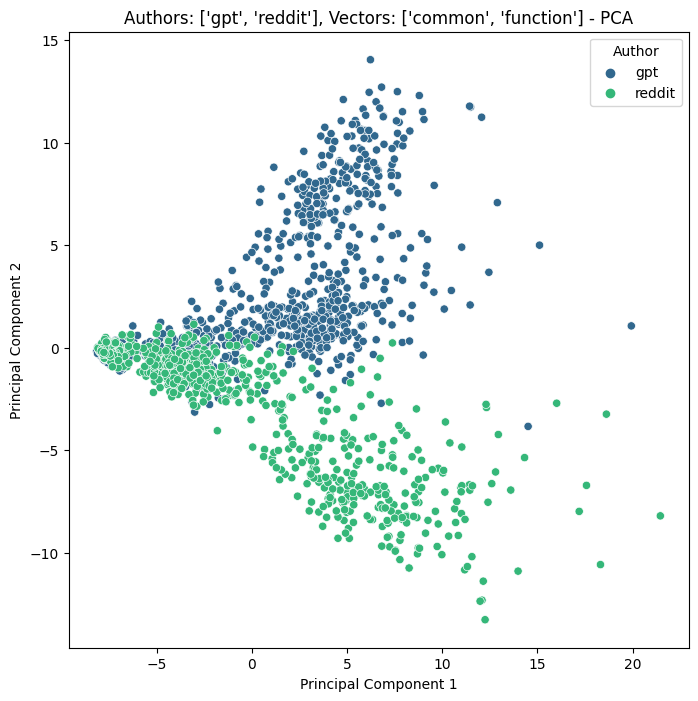

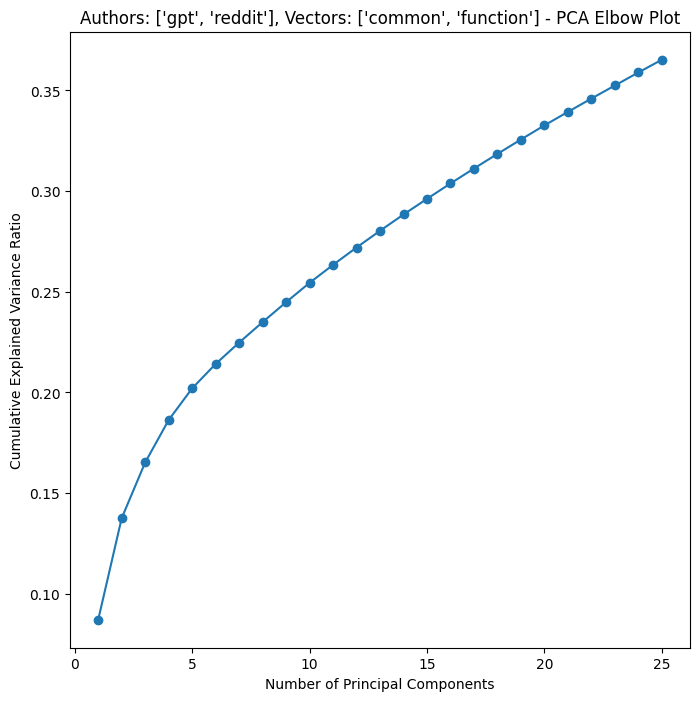

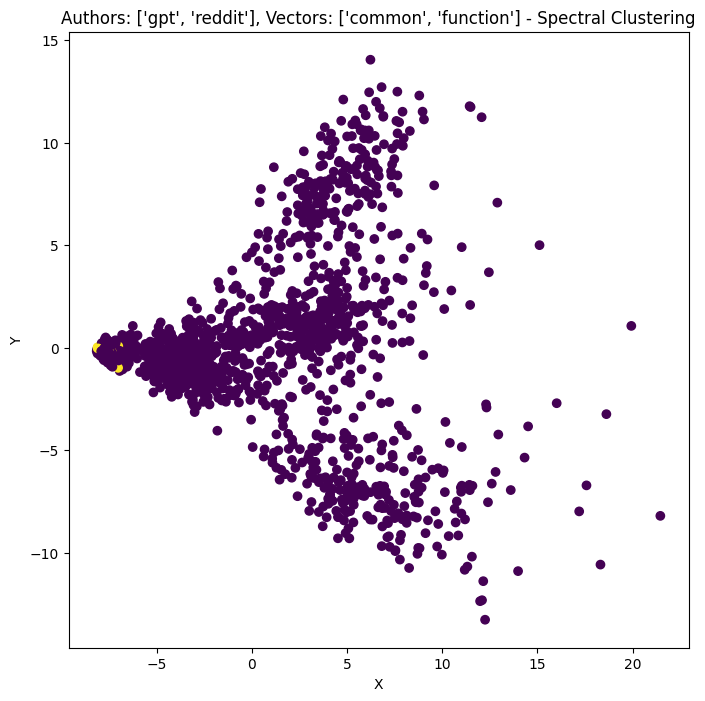

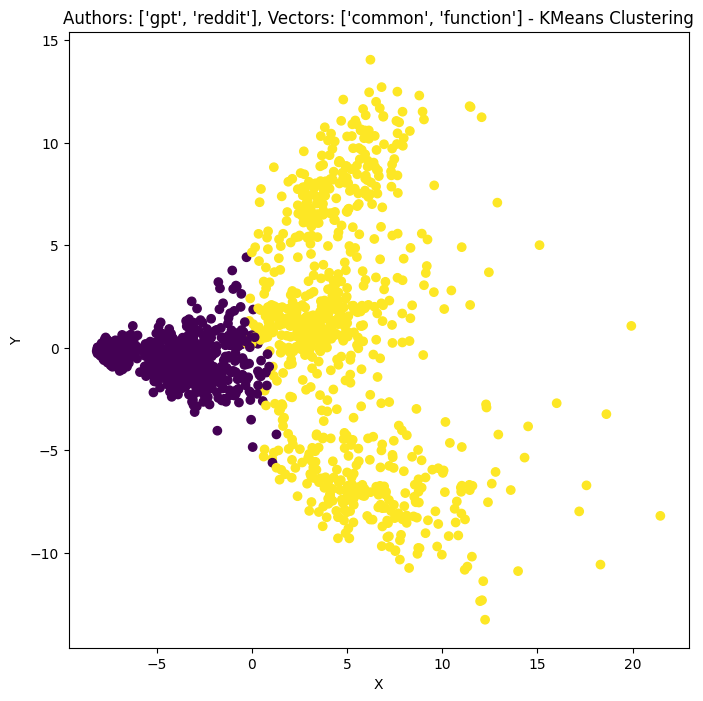



           0         1         2         3         4         5         6    \
0    -0.312491  0.035625  0.039736 -0.228491 -0.138373 -0.449980  0.902430   
1    -0.520797  0.115831 -0.968792  0.210417 -0.600591  0.320447  0.531248   
2    -0.495289 -0.312428 -0.115480 -0.067945 -0.291759 -0.195221  0.122882   
3     0.025679  0.106124 -0.690785 -0.366826 -1.262719  0.079266  0.671336   
4     0.042719 -0.315119 -0.127682 -0.023005  0.017020 -0.310040  0.373739   
...        ...       ...       ...       ...       ...       ...       ...   
1595 -0.059908  0.482970 -0.037216 -0.141533 -0.101148 -0.213954  0.427868   
1596 -0.467156  0.444557  0.129791 -0.403341 -0.450882 -0.379780  0.330679   
1597 -0.232314 -0.150689 -0.067912  0.254557 -0.112705 -0.425403  0.132208   
1598 -0.277892  0.358550 -0.079769 -0.220195 -0.538075 -0.128142  0.814758   
1599 -0.155688  0.426436  0.211068 -0.307870 -0.126390 -0.350579  0.337523   

           7         8         9    ...       758       759  

/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


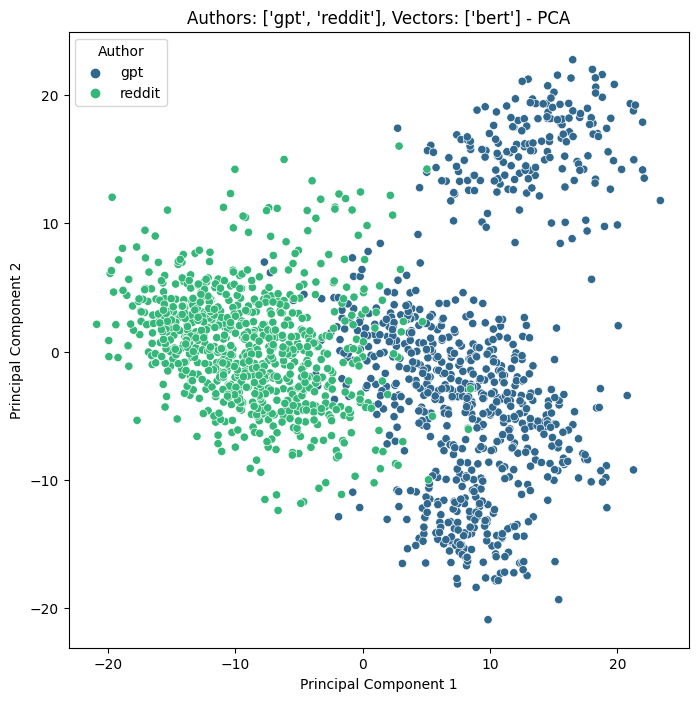

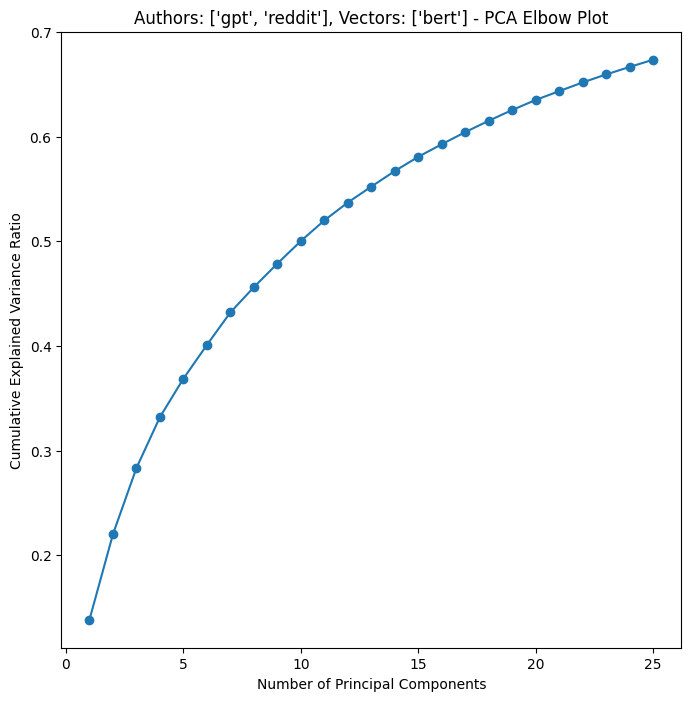

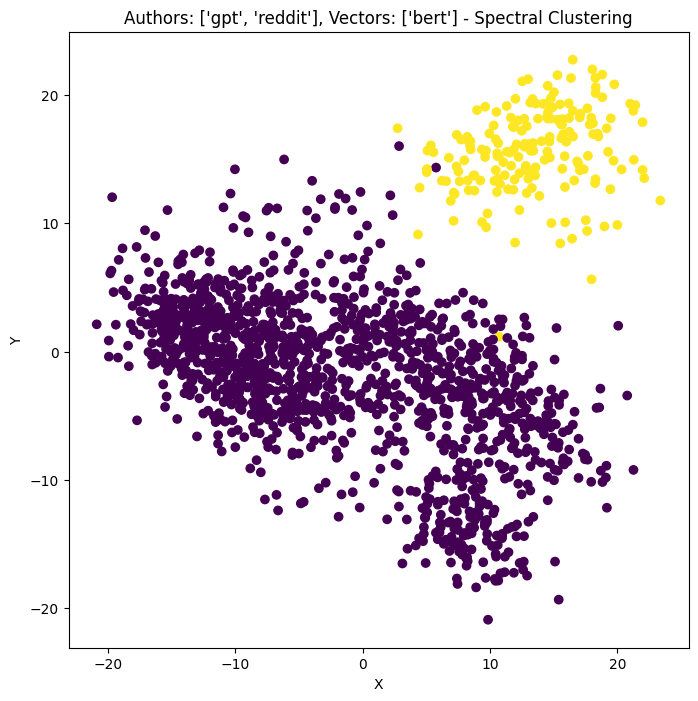

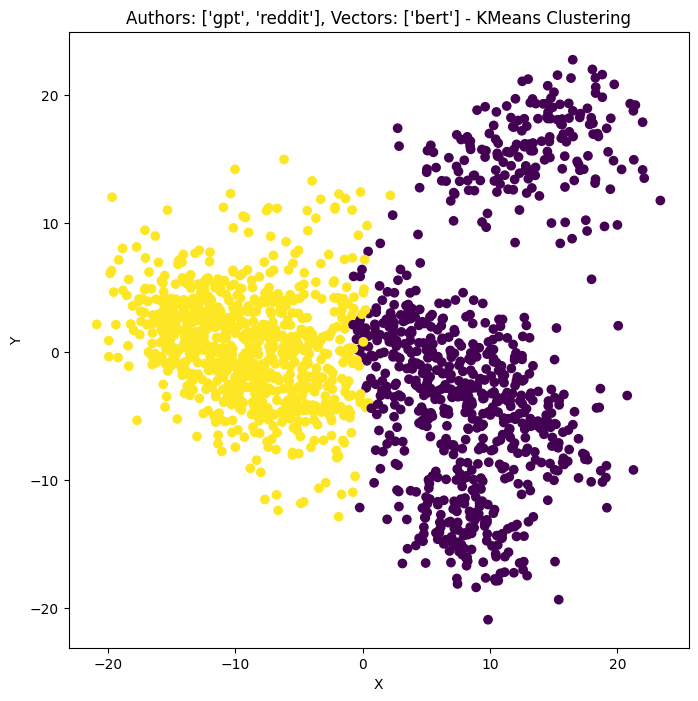



      0    1    2    3    4    5    6    7    8    9    ...       758  \
0      11   10    6    4    6    1   25   13    0    5  ... -0.156785   
1       4    3    1    3    0    1   11    1    0    1  ...  0.048637   
2       6    8   10    6    5    4    6    2    0    2  ...  0.139906   
3       4    8    7    4    6    2   16    2    0    4  ... -0.388026   
4       1    2    7    3    1    2    3    0    0    1  ...  0.096452   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...       ...   
1595    0    0    1    0    0    0    0    0    0    1  ...  0.125767   
1596    4    0    1    0    0    2    0    0    0    1  ...  0.047844   
1597    7    9    6    6    8    4    9    1    0    0  ... -0.417138   
1598    7    6    7    3    5    4    0    0    1    2  ...  0.104039   
1599    4    6    4    2    2    3    7    2    0    1  ... -0.159910   

           759       760       761       762       763       764       765  \
0     0.127223 -0.047249 -0.585648 -0.01786

/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


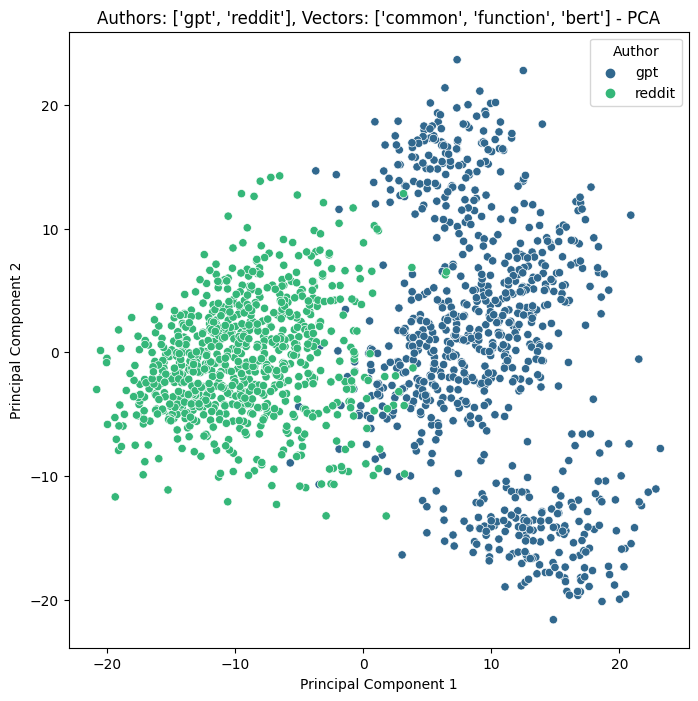

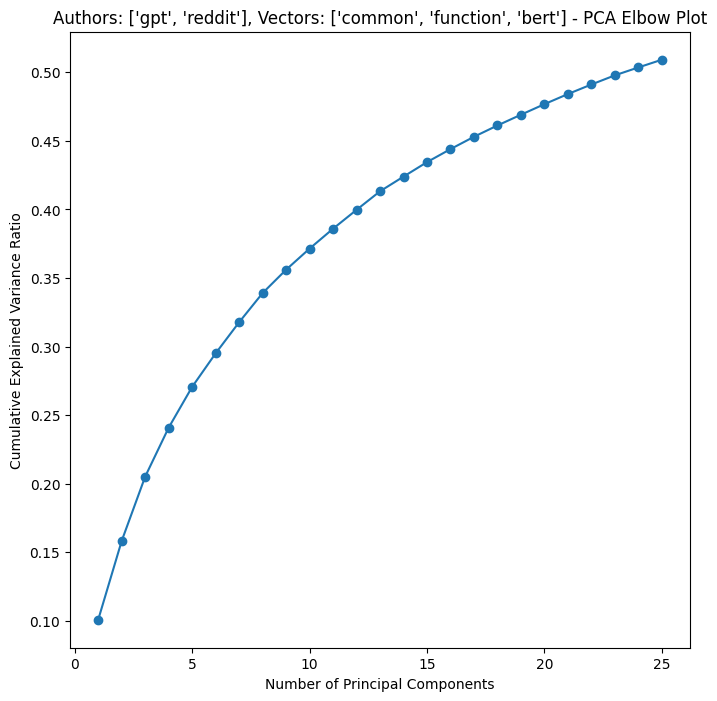

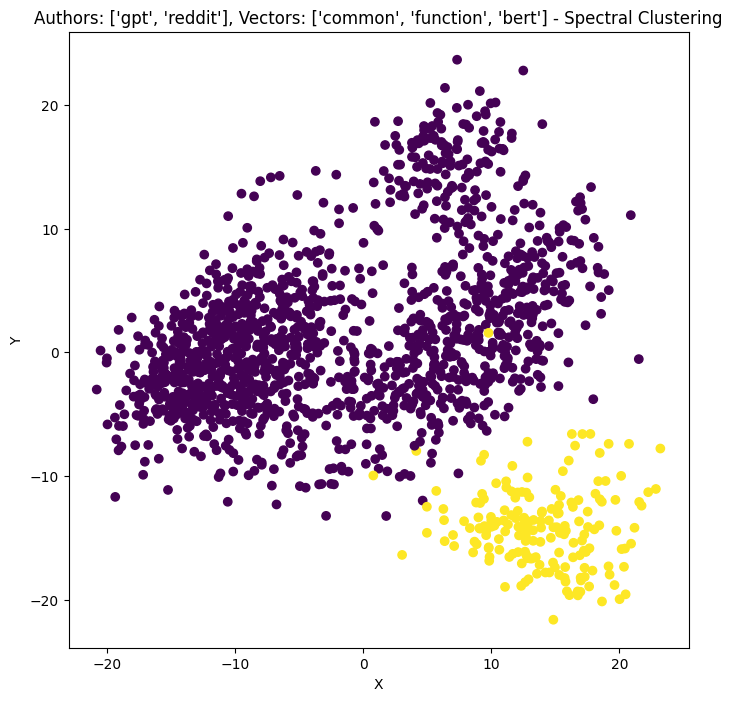

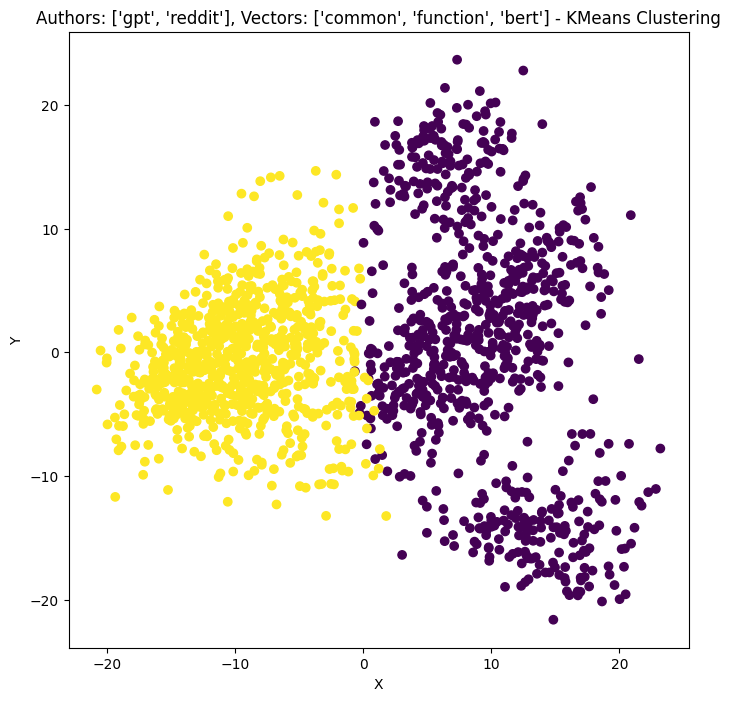

In [14]:
for vector_names in list_of_vector_names:
    cluster_graph(["gpt", "reddit"], vector_names)
    print("\n")

# Reddit vs. Bard

      0   1   2   3   4   5   6   7   8   9   ...  90  91  92  93  94  95  96  \
0      8   0   3   3   3   3   0   1   0   0  ...   1   0   0   0   0   1   2   
1      7   5   6   1   3   3  15   2   0   2  ...   0   0   0   0   0   0   0   
2      4   1   3   1   1   2   8   3   0   0  ...   0   0   0   0   0   0   0   
3      6   5   8   4   6   4   0   0   0   1  ...   0   0   0   0   0   0   0   
4      6   3   5   2   0   2   0   0   0   3  ...   1   0   0   0   0   2   0   
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
1595  15   5   9  14   6   9   0   9   0   2  ...   0   0   0   0   0   0   0   
1596  33  10  18  10  13  10   4   6   5   4  ...   0   0   0   4   0   0   0   
1597  15   8   9   9   7   2  14   3   0   1  ...   0   0   0   0   0   0   0   
1598   0   1   0   0   1   0   0   0   0   0  ...   0   0   0   0   0   0   0   
1599  13  10  13   3  11   4   0   2   0   2  ...   0   0   0   1   0   0   0   

      97  98  99  
0      0

/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


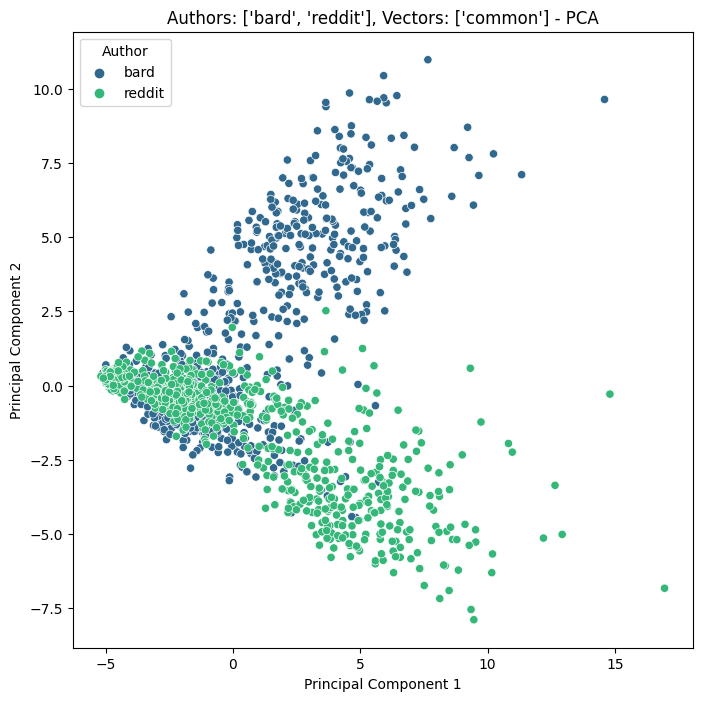

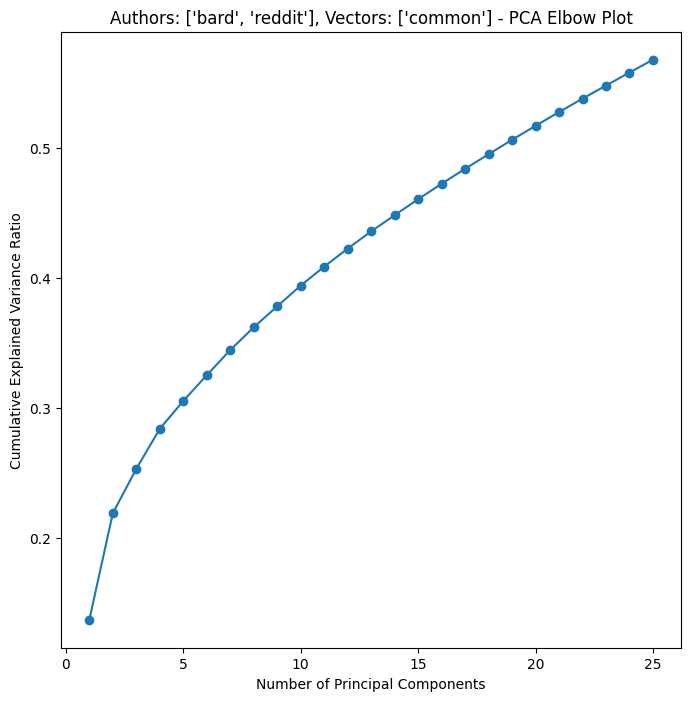

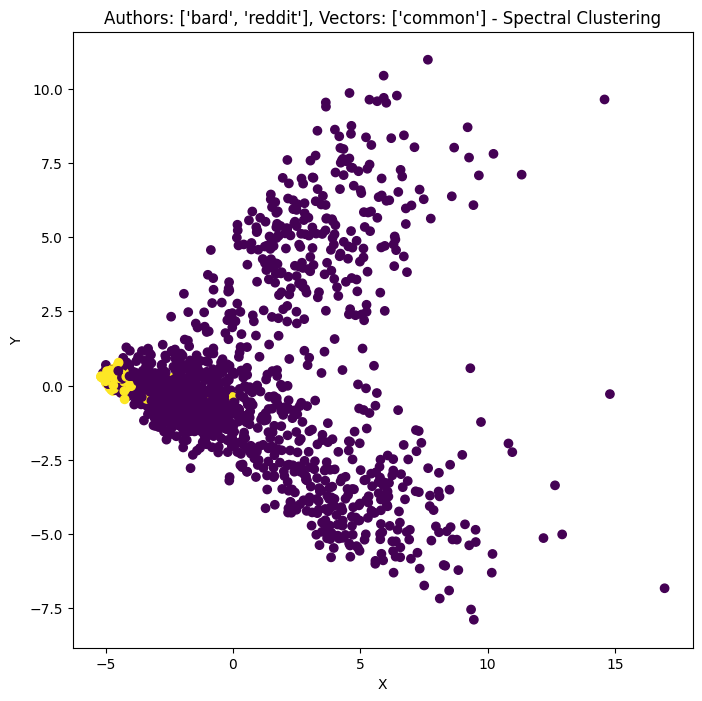

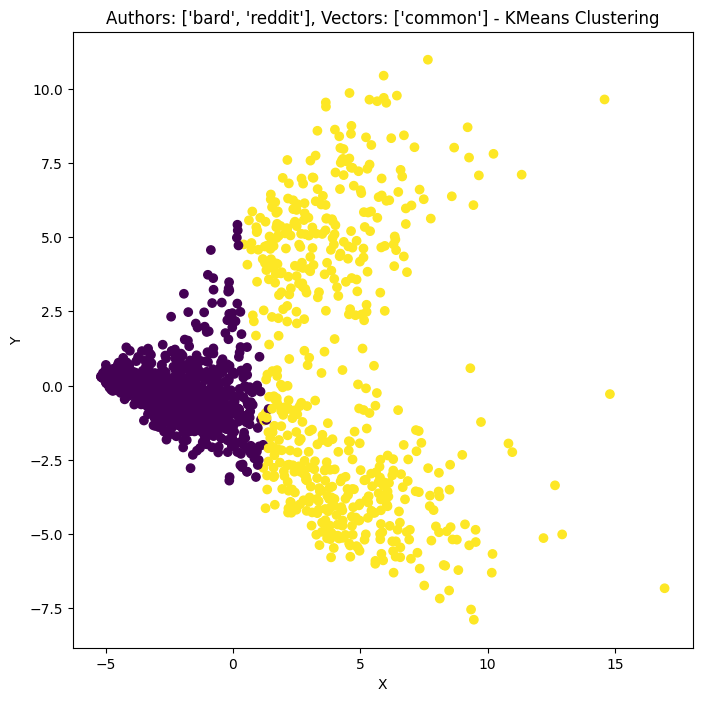



      0    1    2    3    4    5    6    7    8    9    ...  267  268  269  \
0       1    0    0    0    0    0    0    0    2    0  ...    0    0    0   
1       6    0    0    0    0    0    0    1    1    0  ...    0    0    0   
2       1    0    0    0    0    0    0    0    0    0  ...    0    0    0   
3       6    0    1    0    0    0    0    1    0    0  ...    0    1    0   
4       2    0    0    0    0    0    0    0    1    0  ...    0    0    4   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1595    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
1596    5    0    0    0    0    0    0    0    0    0  ...    0    0    1   
1597    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
1598    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
1599    4    0    0    0    0    0    0    0    0    0  ...    0    0    0   

      270  271  272  273  274  275  276  
0       0    0    1

/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


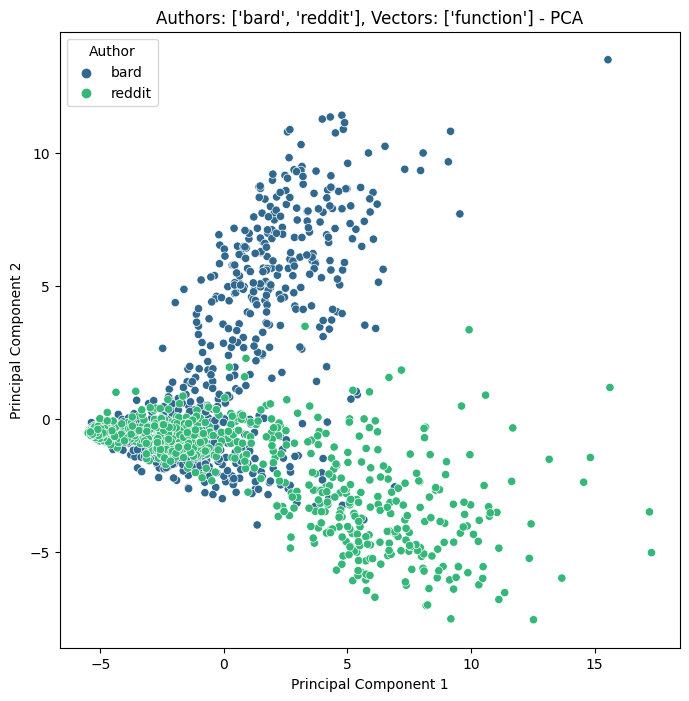

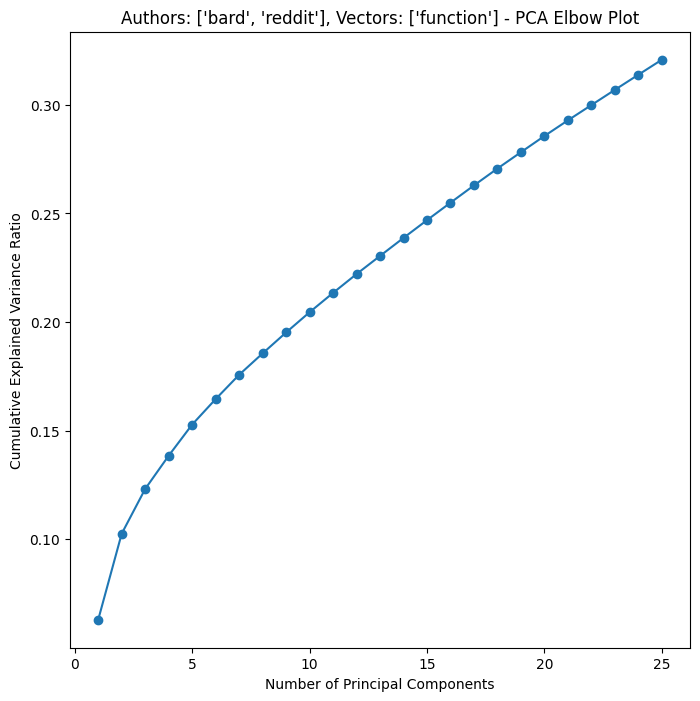

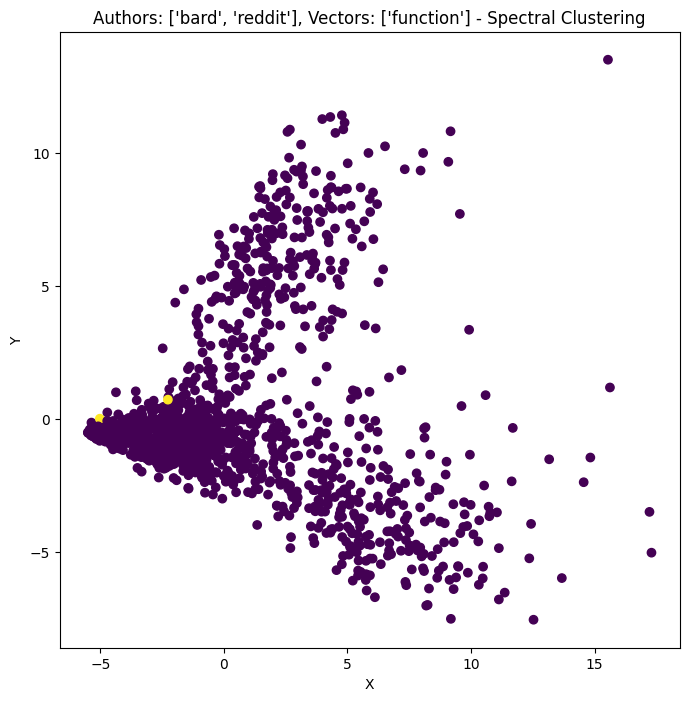

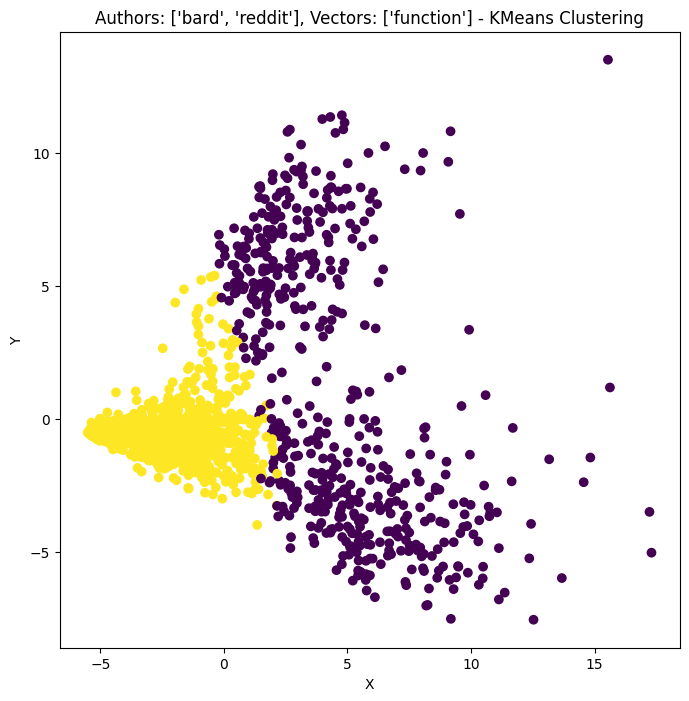



      0    1    2    3    4    5    6    7    8    9    ...  267  268  269  \
0       5    0    0    2    4    3    0    2    0    1  ...    0    0    0   
1      12    1    2    4    5    0    0    0    0    0  ...    0    0    0   
2      11    5    1    5    2    1    0    0    0    0  ...    3    0    0   
3       8    7    8    4    8    5   12    6    0    6  ...    1    1    0   
4       9    7    7    1    8    4    0    0    0    8  ...    0    0    0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1595   30   11   20    5   11    3    0    3    0    0  ...    0    1    5   
1596    2    3    6    1    2    1    2    0    0    2  ...    0    0    0   
1597    0    0    0    0    0    0    0    0    0    1  ...    0    0    0   
1598    0    1    0    0    0    0    0    0    0    1  ...    0    0    0   
1599    7    9    3    0    5    3    6    2    0    0  ...    0    0    4   

      270  271  272  273  274  275  276  
0       0    0    0

/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


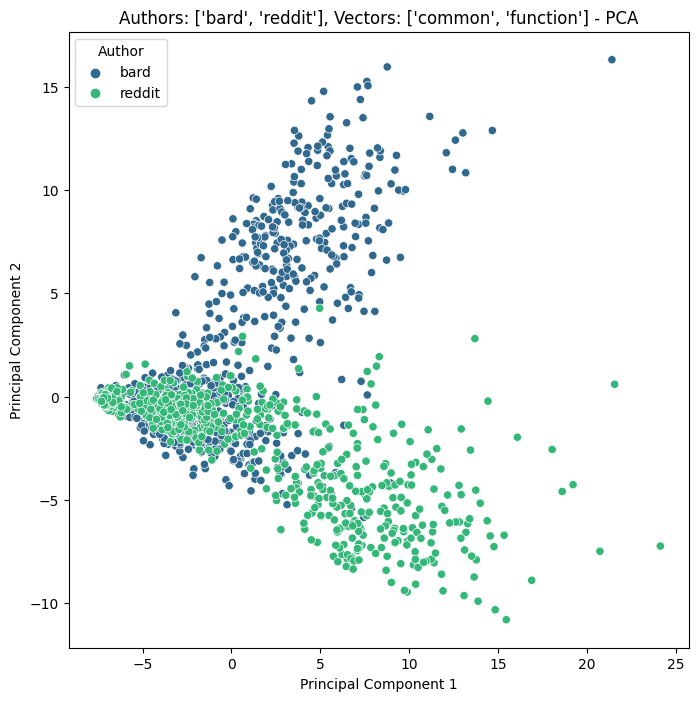

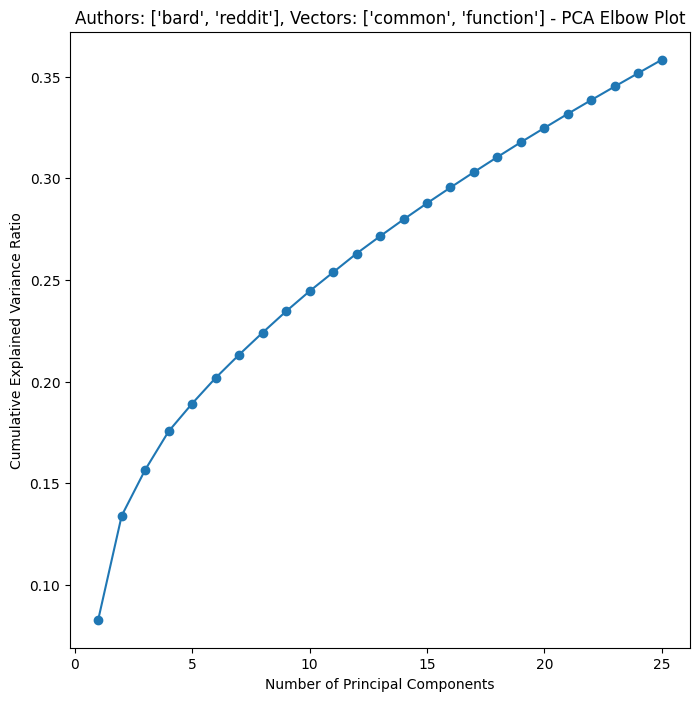

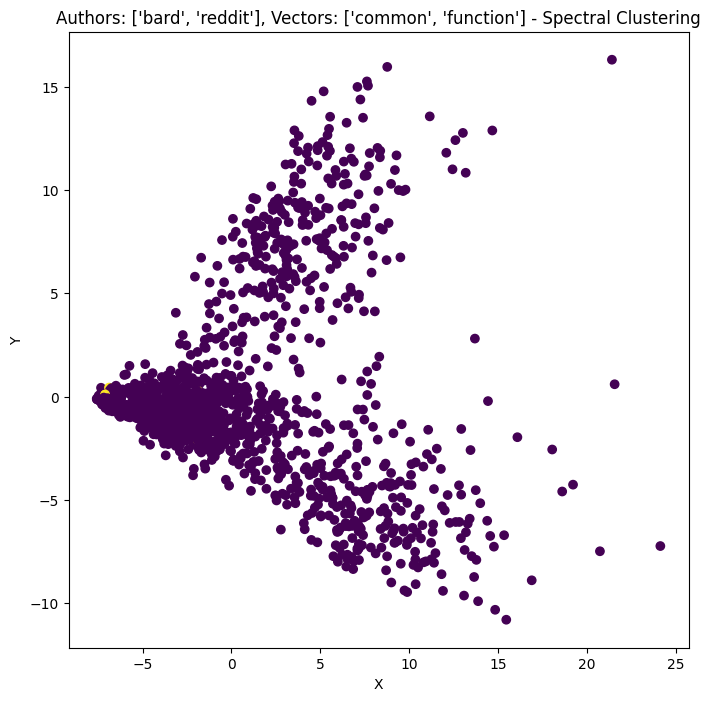

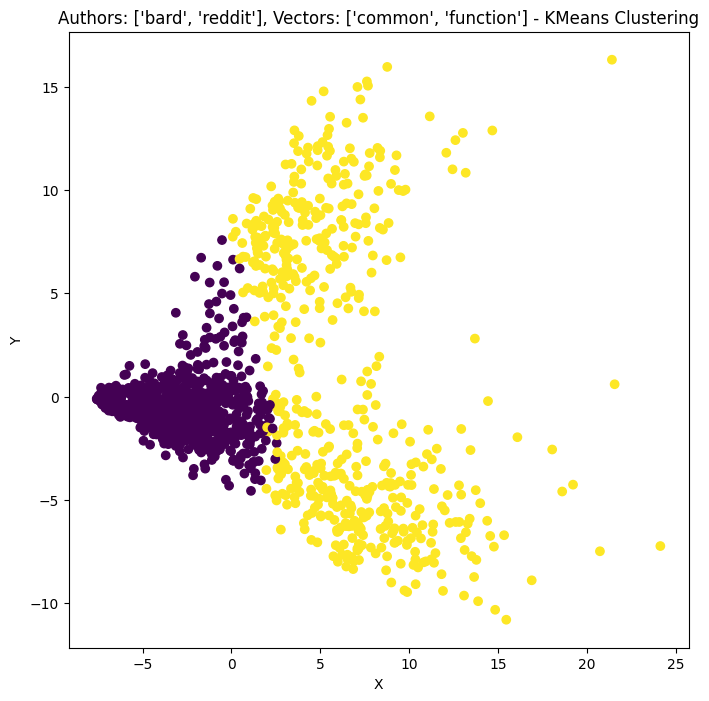



           0         1         2         3         4         5         6    \
0    -0.416557 -0.379779 -0.142901 -0.026287 -0.409518 -0.400684  0.427589   
1     0.163068 -0.151913 -0.296026 -0.458360 -0.204126  0.107124  0.723535   
2    -0.243043 -0.116430 -0.657856  0.012140 -0.625437 -0.065381  0.491045   
3     0.368044 -0.070516 -0.148368 -0.212314 -0.477755 -0.132984  0.503101   
4    -0.132932 -0.033577 -0.592910 -0.106013 -0.526587 -0.150914  0.262057   
...        ...       ...       ...       ...       ...       ...       ...   
1595 -0.045374  0.206878 -0.011894 -0.213469  0.027910 -0.155149  0.111573   
1596 -0.130942  0.264174  0.113269 -0.398441  0.314150  0.017324  0.339696   
1597  0.176298  0.274523 -0.066360 -0.205313 -0.114250 -0.513430  0.513099   
1598 -0.014700  0.004167 -0.305997  0.148689 -0.345865 -0.222550  0.012780   
1599 -0.371124  0.045463  0.147432 -0.284211  0.033533 -0.384341  0.178478   

           7         8         9    ...       758       759  

/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


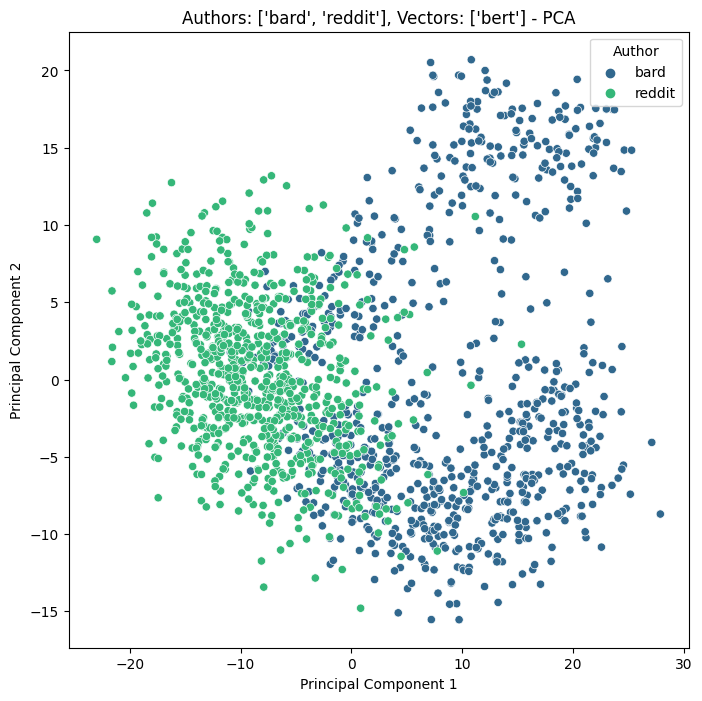

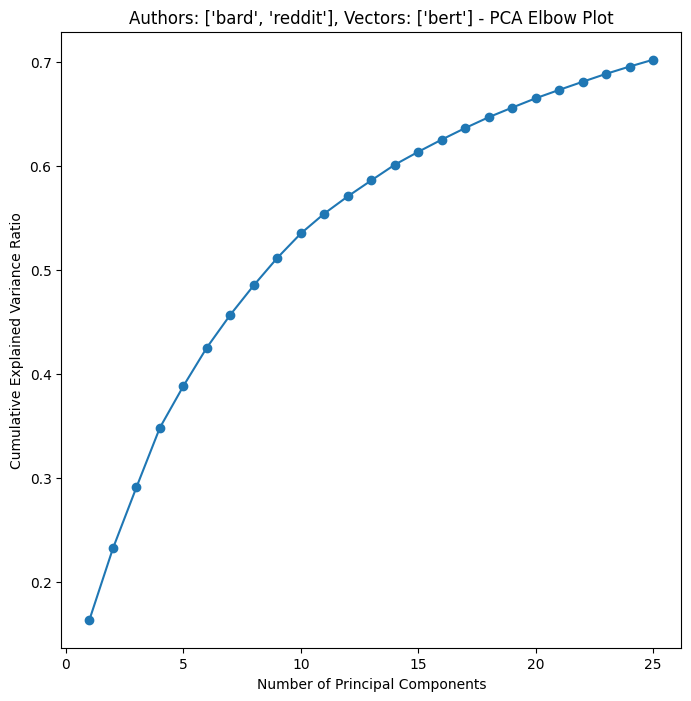

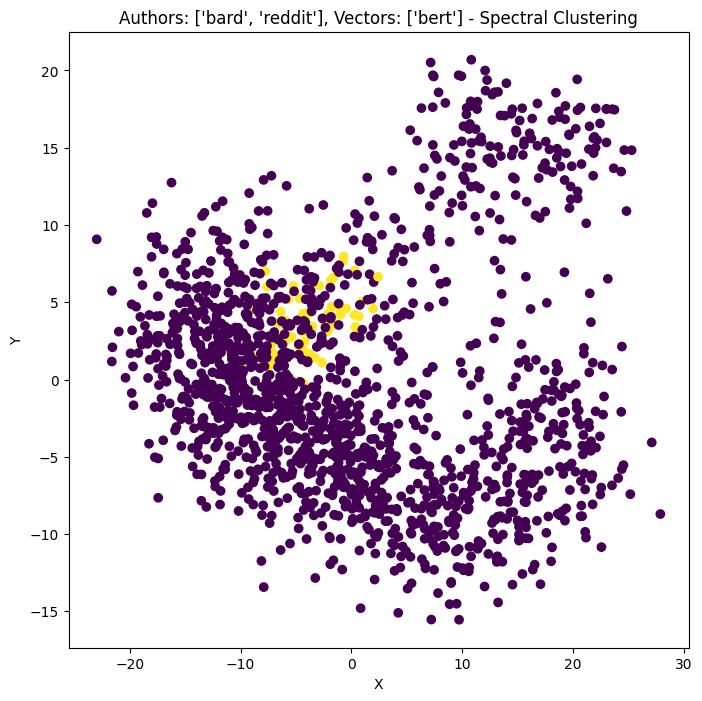

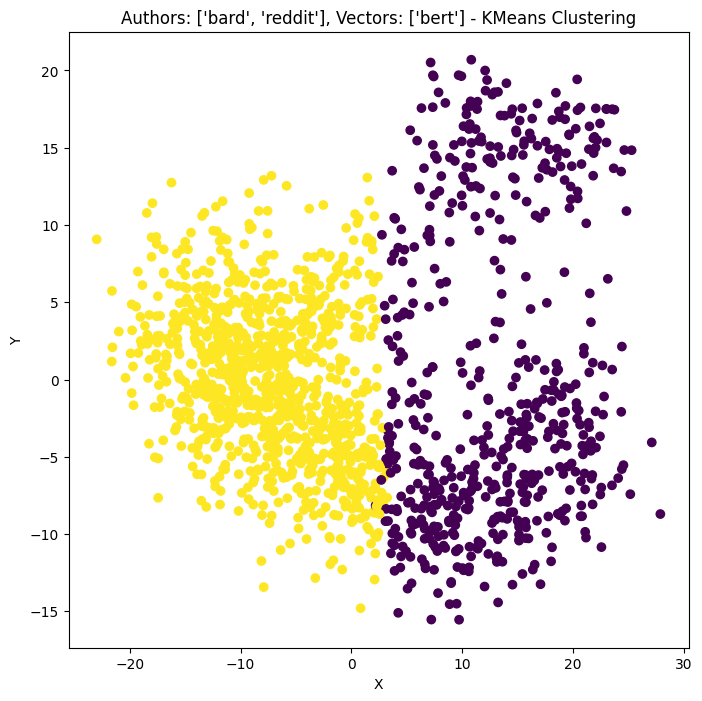



      0    1    2    3    4    5    6    7    8    9    ...       758  \
0      18    6    6    3    3    2    0    2    0    1  ...  0.176276   
1      11    3    3    5    2    2   15    0    0    1  ...  0.047063   
2       2    6    6    3    2    1   16    2    1    1  ...  0.415524   
3       6    5    5    0    0    0   18    0    0    4  ...  0.052973   
4       5    5    5    2    1    1    0    2    0    1  ...  0.064754   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...       ...   
1595   11    9   10    8    8    2    6    0    0    1  ...  0.157308   
1596    8    7    4    6    2    2    5    2    0    0  ...  0.137586   
1597    0    1    0    0    0    0    0    0    0    1  ...  0.555892   
1598    8    7    9    6    2    7    7    4    0    1  ...  0.051183   
1599    0    2    1    0    0    1    0    0    0    0  ... -0.068115   

           759       760       761       762       763       764       765  \
0    -0.362313 -0.388468 -0.654746 -0.42260

/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


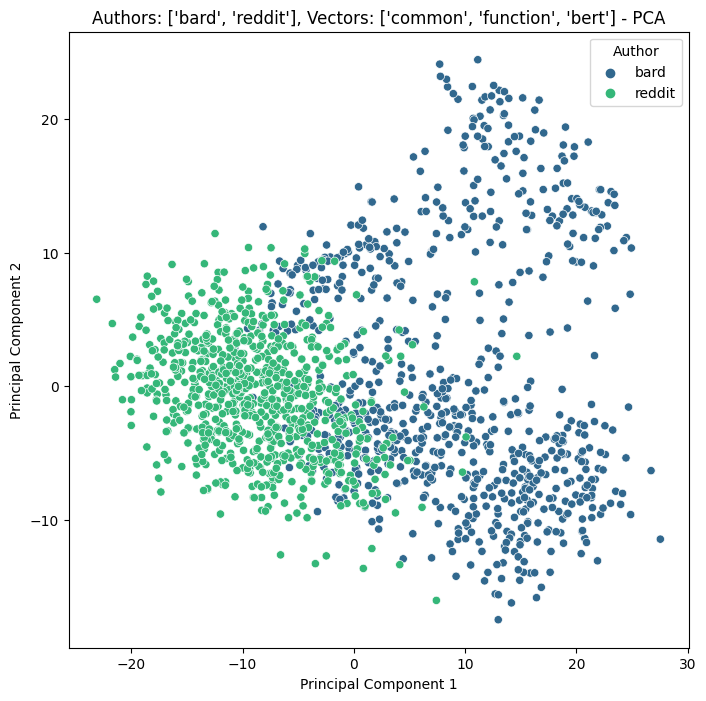

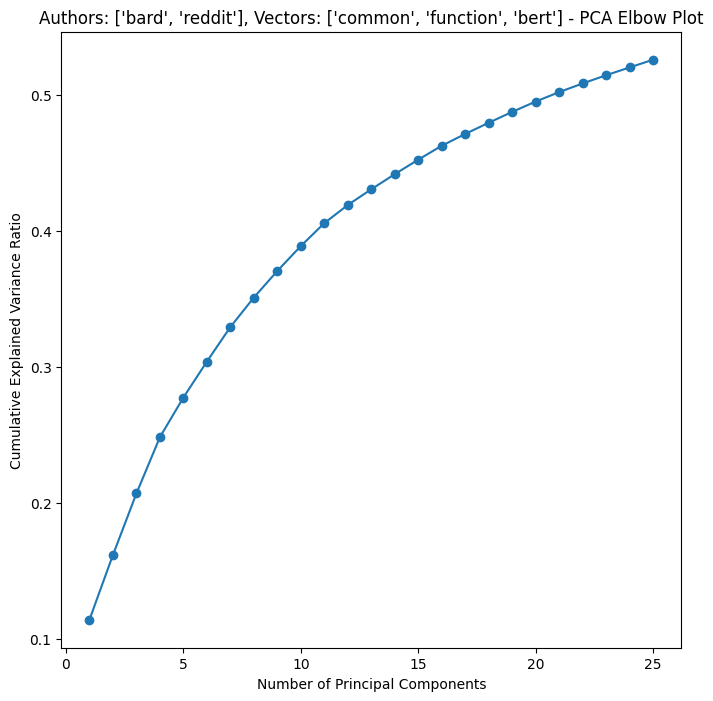

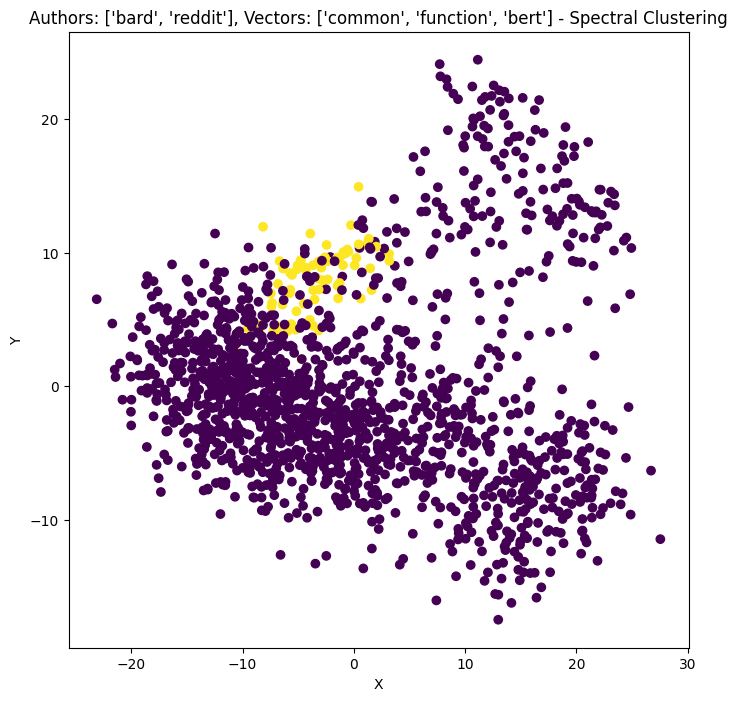

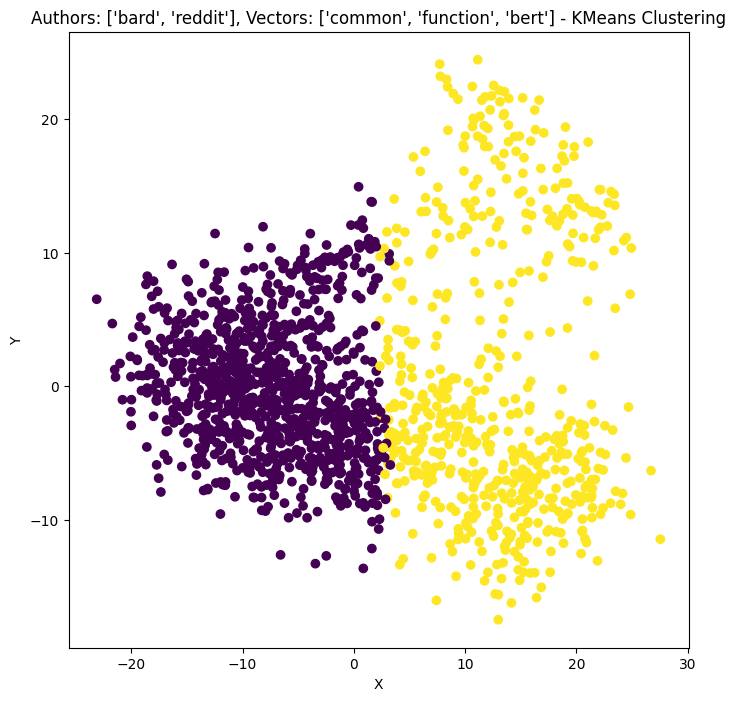

In [15]:
for vector_names in list_of_vector_names:
    cluster_graph(["bard", "reddit"], vector_names)
    print("\n")

# Reddit vs. Gemini

     0   1   2   3   4   5   6   7   8   9   ...  85  86  87  88  89  90  91  \
0     1   4  18   0   5   0   1   0   0   0  ...   0   0   0   0   1   0   5   
1     0   1  12   0   3   1   0   0   0   0  ...   3   0   0   0   1   0   7   
2     0   3  13   0   4   2   1   1   0   0  ...   2   3   0   0   1   0   8   
3     0   4   8   0   2   1   0   0   0   0  ...   2   0   0   0   1   0   6   
4     1   3  15   0   2   0   0   0   0   0  ...   0   1   0   0   0   0   3   
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
795   0   2  18   0   4   1   0   1   0   0  ...   2   0   2   0   2   0   5   
796   0   3   2   0   1   0   0   0   0   0  ...   0   0   0   0   2   0   3   
797   0   1  15   0   6   0   0   1   0   0  ...   3   0   0   0   3   0   4   
798   0   0   1   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
799   0   4  18   0   2   2   0   1   0   1  ...   3   0   2   0   3   1   2   

     92  93  94  
0     0   0   0  
1  

/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


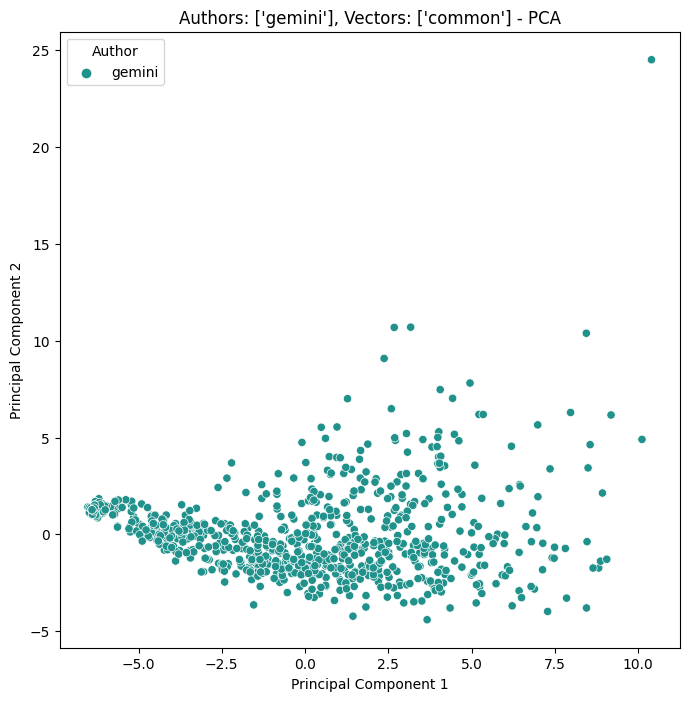

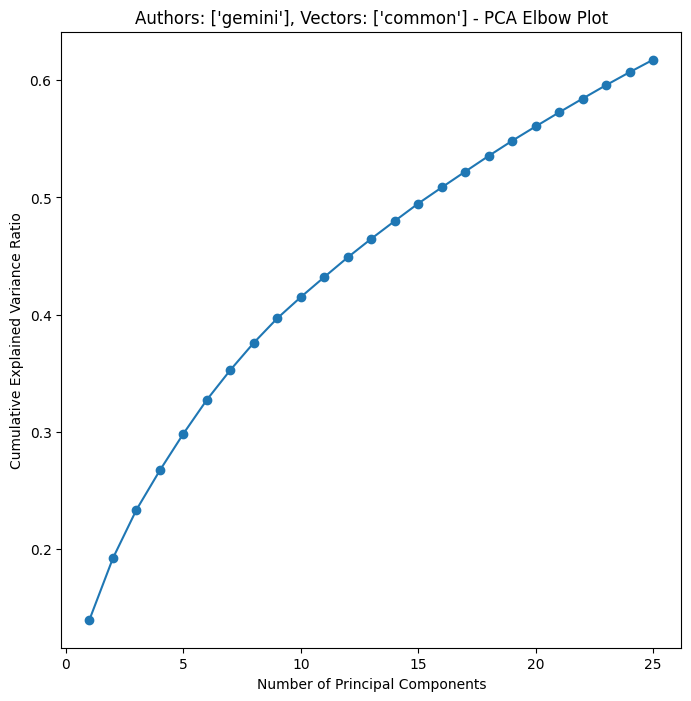

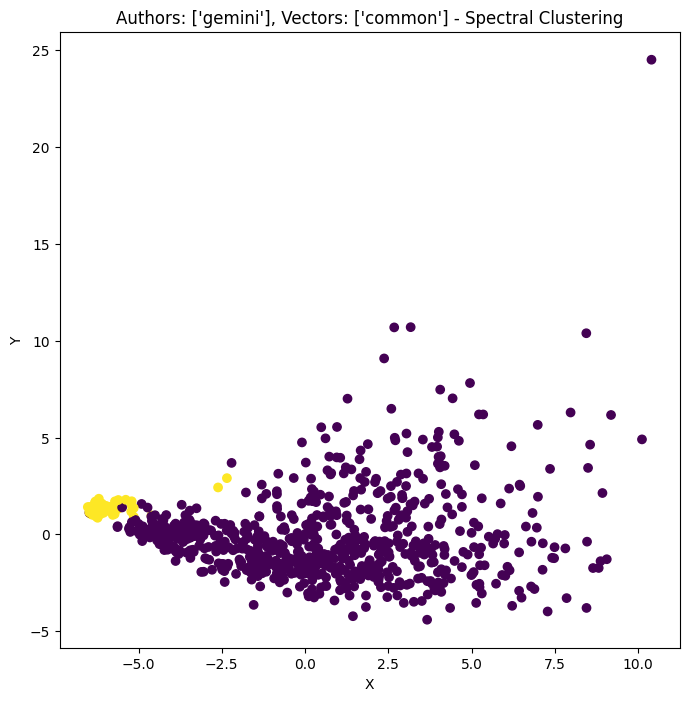

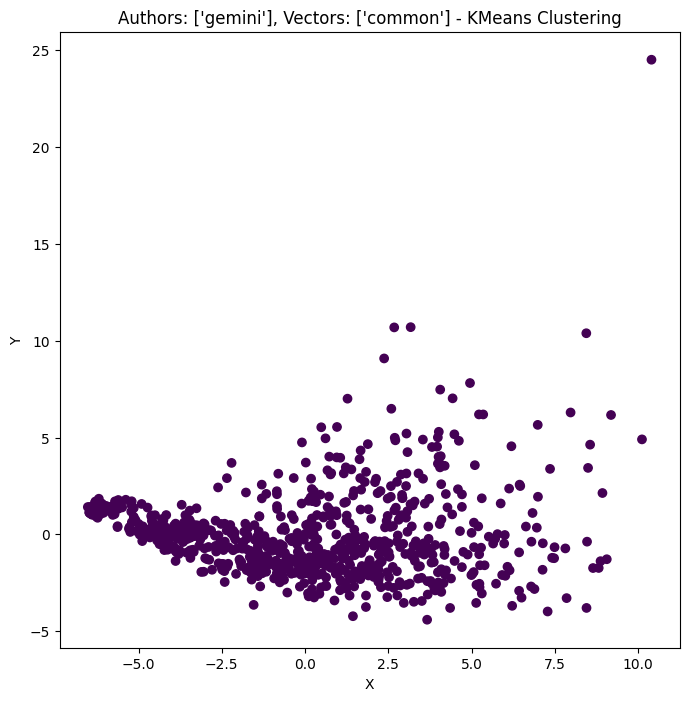



     0    1    2    3    4    5    6    7    8    9    ...  211  212  213  \
0      0    0    0    0    0    0    0    0    0    0  ...    3    0    0   
1      0    0    0    0    0    0    0    0    0    0  ...    5    0    0   
2      0    0    0    0    0    0    0    0    0    0  ...    6    0    0   
3      0    1    0    0    0    0    0    0    0    0  ...    6    1    0   
4      1    0    0    0    0    0    0    0    0    0  ...   10    1    0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
795    0    0    0    0    0    0    0    0    0    0  ...    1    0    0   
796    0    0    0    0    0    0    0    0    0    1  ...    9    1    0   
797    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
798    0    1    0    0    1    1    0    0    0    1  ...    5    1    0   
799    0    0    0    0    0    0    0    0    0    0  ...   12    1    1   

     214  215  216  217  218  219  220  
0      0    0    0    1    0    

/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


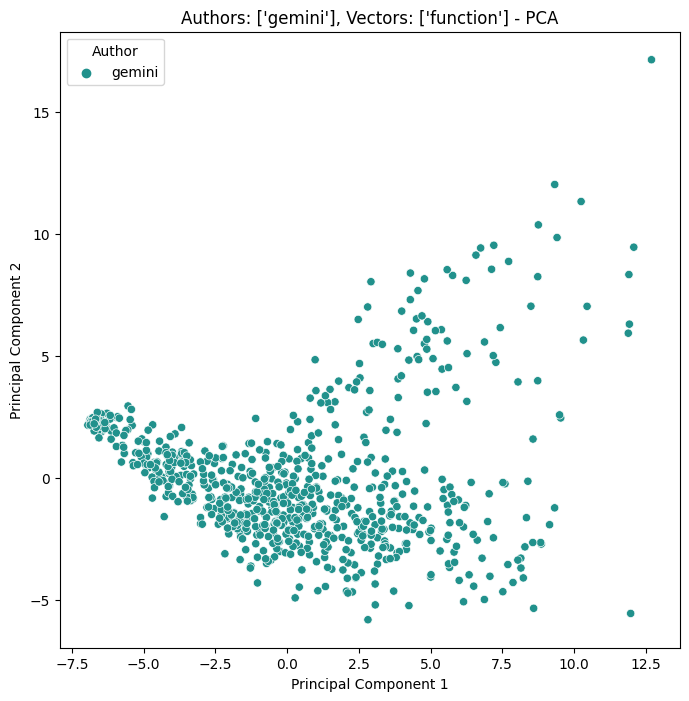

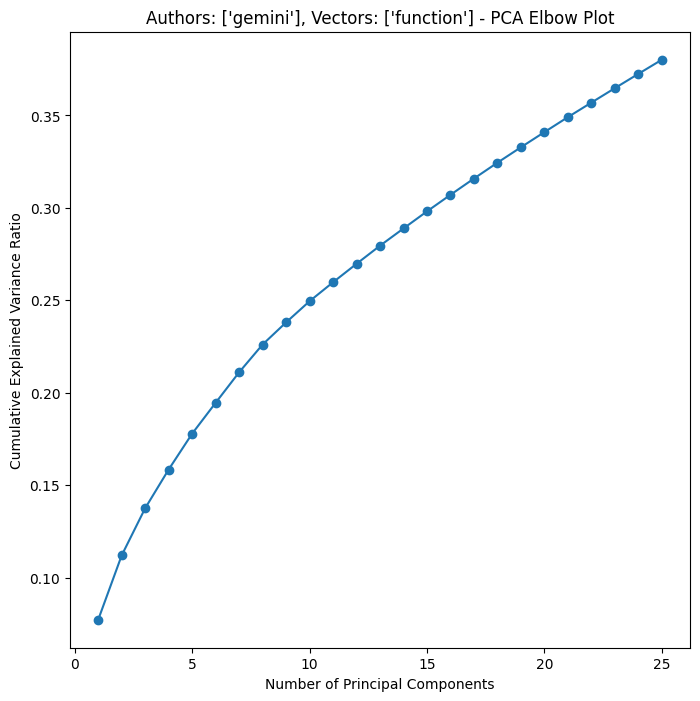

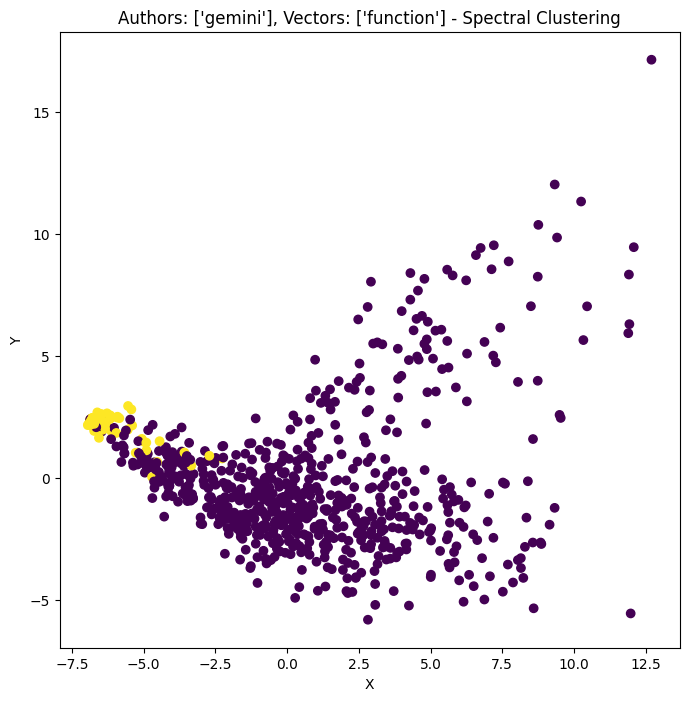

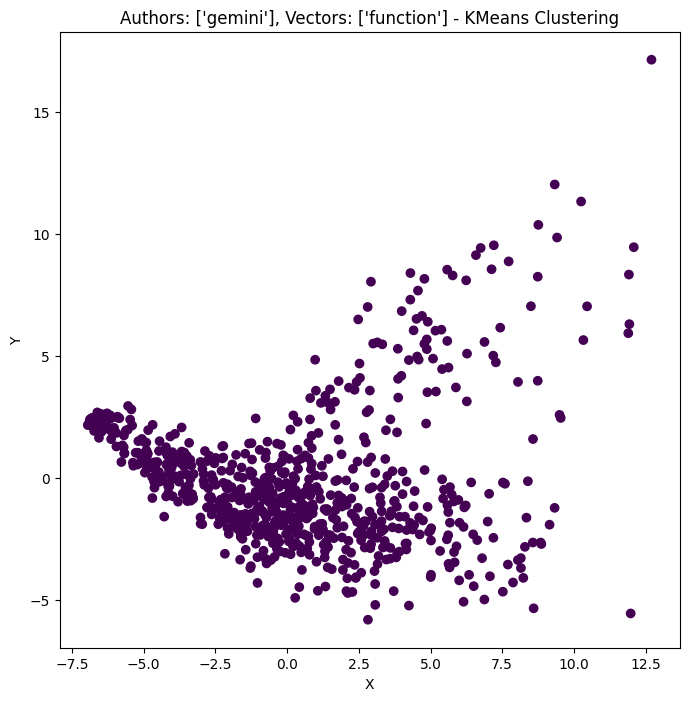



     0    1    2    3    4    5    6    7    8    9    ...  211  212  213  \
0      1    0   14    0    7    2    0    0    0    3  ...    4    1    0   
1      0    1   15    0    9    0    0    2    0    0  ...    2    0    1   
2      1    3   14    0    5    1    0    1    0    0  ...    5    2    1   
3      0    3   13    0    4    1    0    0    0    0  ...    4    0    0   
4      0    3   10    0    3    0    0    0    0    0  ...    5    0    0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
795    0    1   14    0    4    0    0    4    0    0  ...    3    1    0   
796    0    3   12    0    6    1    1    1    0    1  ...    6    2    0   
797    0    0   12    0    3    1    1    3    0    0  ...    7    1    0   
798    0    1   12    0    4    0    0    1    0    1  ...    0    0    1   
799    0    0    6    0    0    1    0    0    0    2  ...    5    1    0   

     214  215  216  217  218  219  220  
0      1    0    1    0    0    

/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


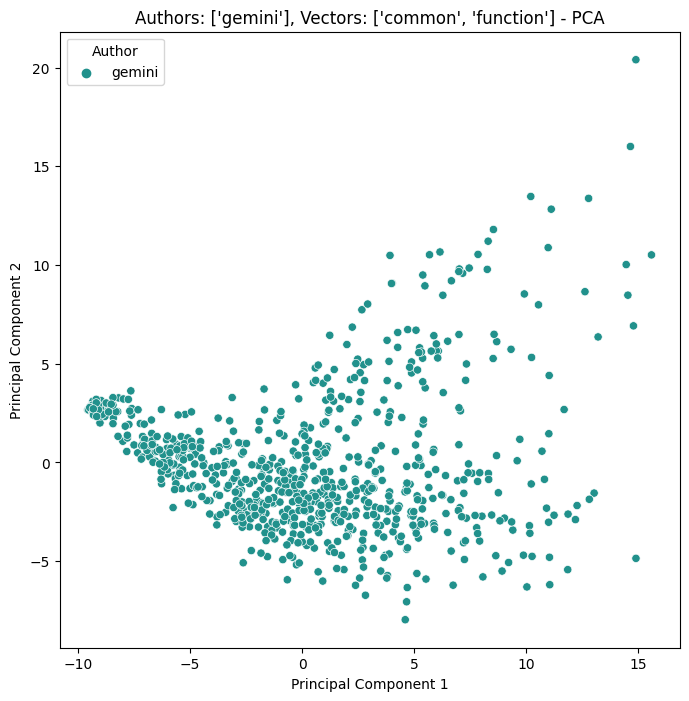

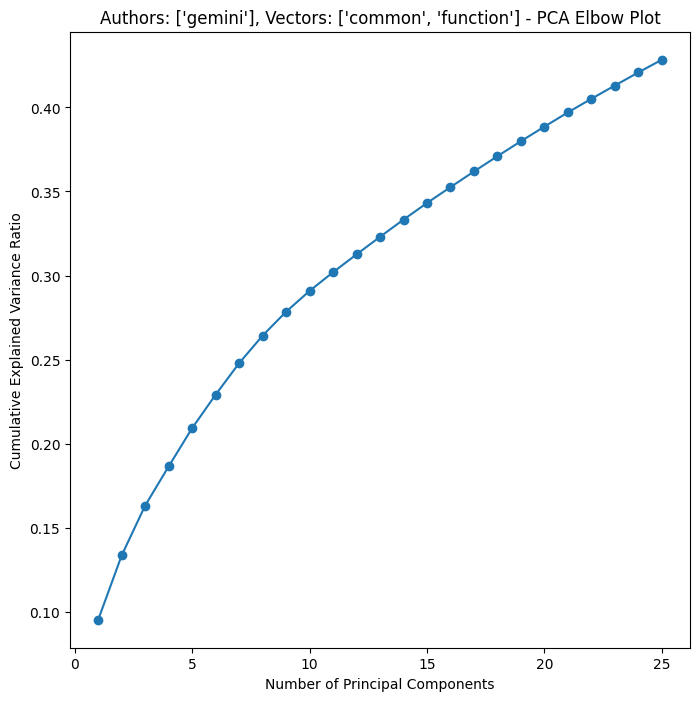

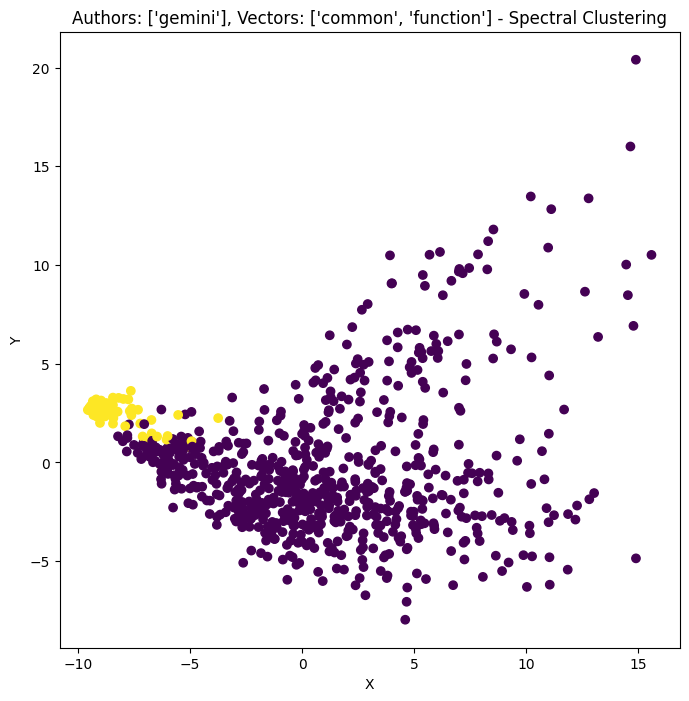

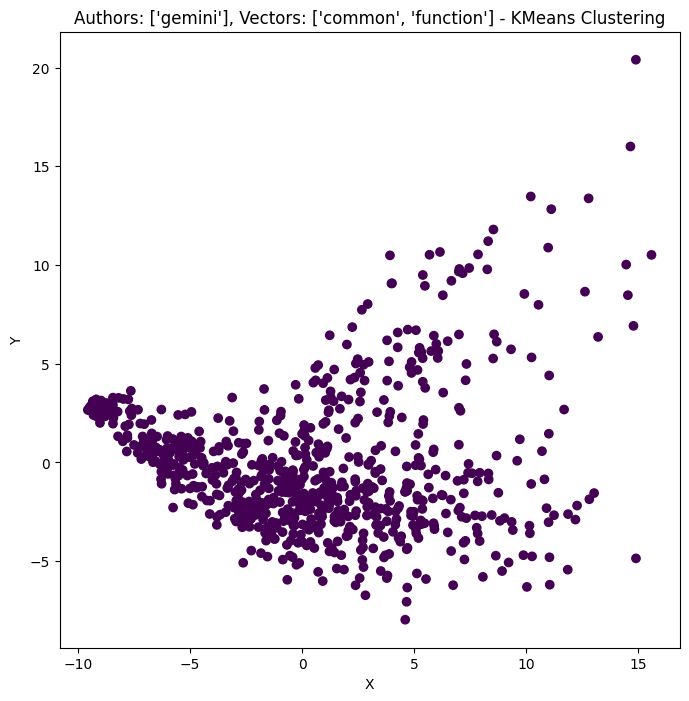



          0         1         2         3         4         5         6    \
0   -0.530133  0.561218 -0.186836 -0.016533 -0.028818 -0.552747  0.414850   
1   -0.566389 -0.260917 -0.266886  0.081405 -0.459525  0.236200  0.268021   
2   -0.095428 -0.041530 -0.457525  0.059789 -0.363607  0.179510  0.233923   
3    0.304384  0.160397 -0.083840 -0.019404 -0.761182  0.060217  0.641932   
4   -0.449647 -0.494013 -0.713235  0.241762 -0.573362  0.092111  0.418516   
..        ...       ...       ...       ...       ...       ...       ...   
795  0.123895 -0.316054 -0.243190  0.016241 -0.106731 -0.180621  0.149777   
796  0.163646  0.096462 -0.512617  0.153798 -0.749099  0.332302  0.568725   
797 -0.249428  0.296635 -0.118408 -0.051055 -0.173904 -0.359161  0.760552   
798 -0.212509 -0.368497 -0.264906 -0.120056 -0.499372 -0.093962  0.531760   
799 -0.041809 -0.238968 -0.326135  0.247244 -0.008416 -0.496940  0.176531   

          7         8         9    ...       758       759       760  \
0

/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


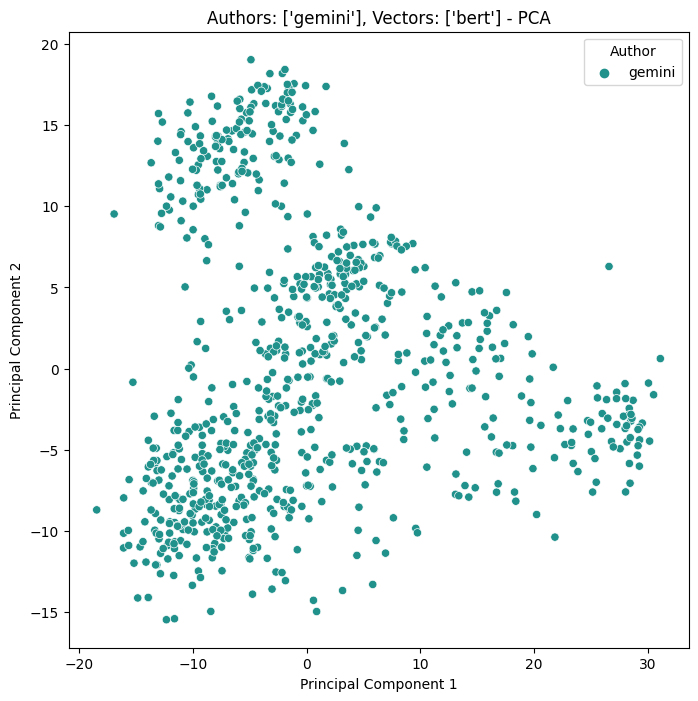

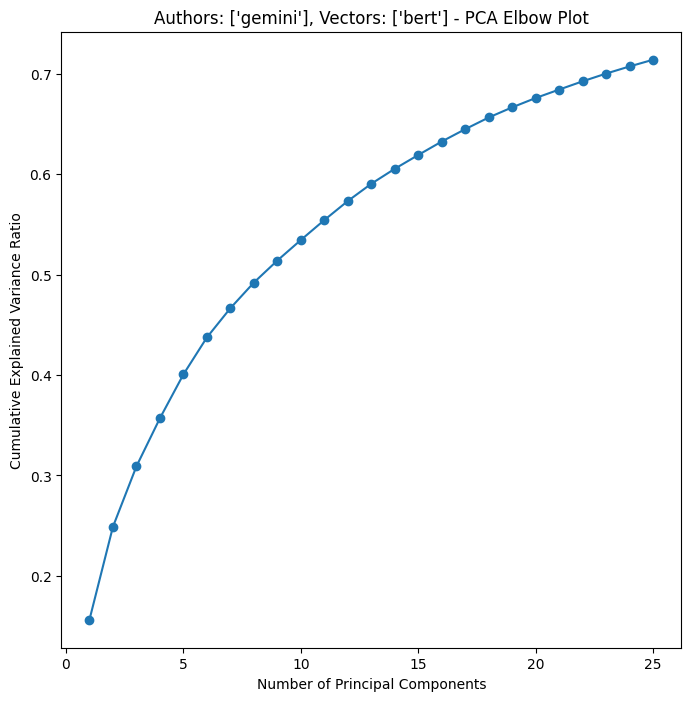

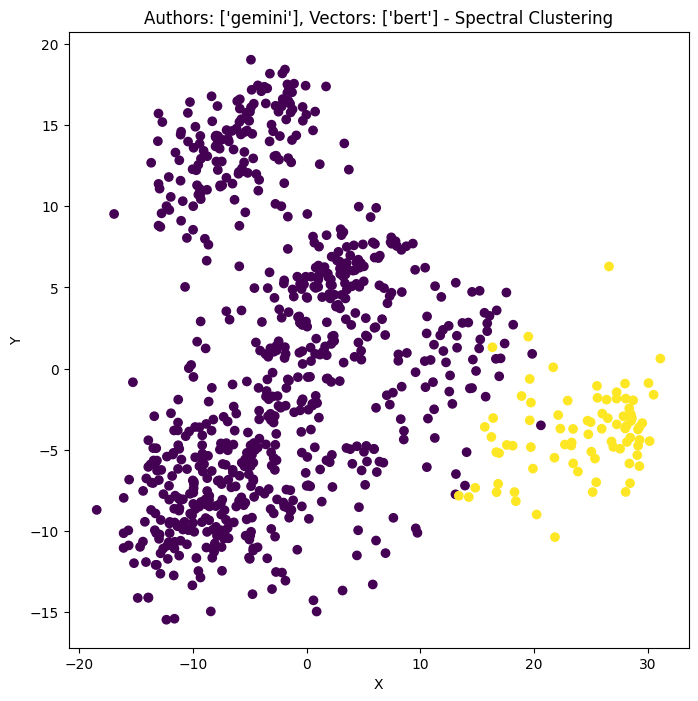

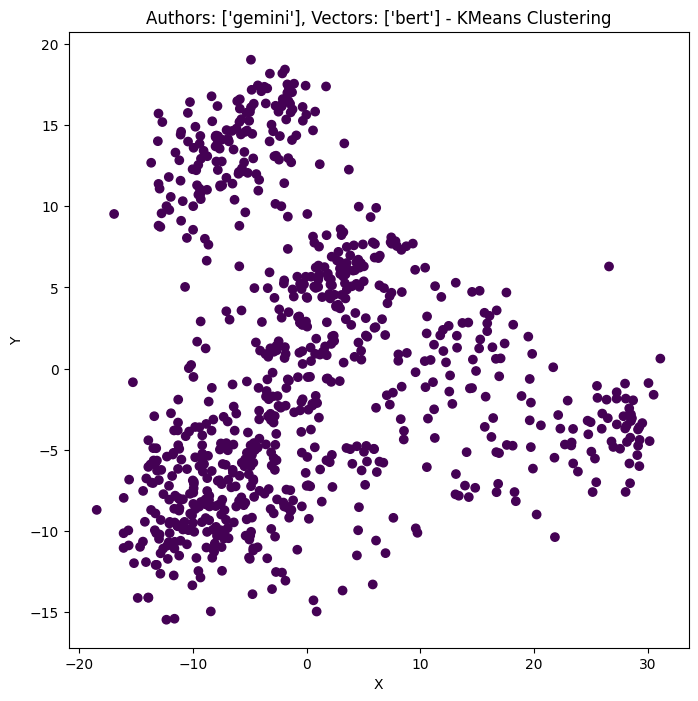



     0    1    2    3    4    5    6    7    8    9    ...       758  \
0      0    1    4    0    6    1    2    5    1    9  ... -0.054683   
1      0    1    2    0    0    0    0    0    0    1  ... -0.108987   
2      1    1   12    1    5    1    0    3    0    3  ... -0.183110   
3      0    1   15    0    2    1    0    1    0    0  ...  0.070419   
4      0    2   15    0   10    2    0    0    0    0  ...  0.142107   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...       ...   
795    0    1   16    0    4    1    0    1    0    0  ...  0.222467   
796    0    3   14    2    2    4    0    0    0    1  ...  0.303260   
797    0    6   13    2    4    1    0    0    0    0  ...  0.363449   
798    0    2    8    0    2    0    0    0    0    0  ...  0.316721   
799    0    0    0    0    0    0    0    0    0    0  ...  0.226354   

          759       760       761       762       763       764       765  \
0    0.056867  0.227906 -0.464195 -0.351820 -0.387855 -0

/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/benjaminshaman/anaconda3/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


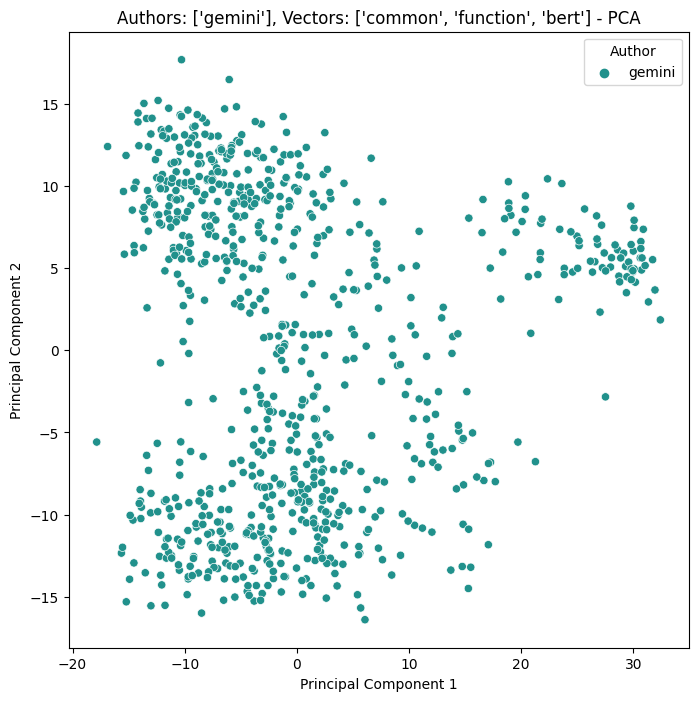

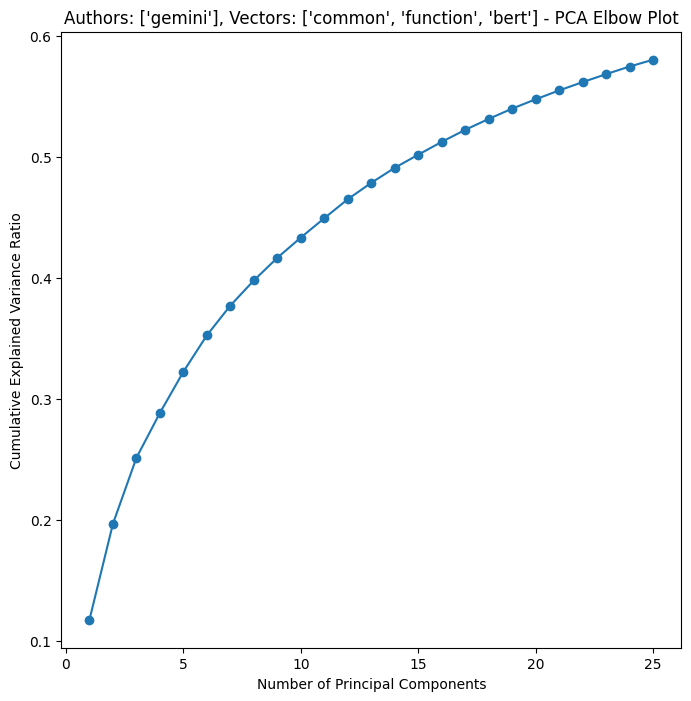

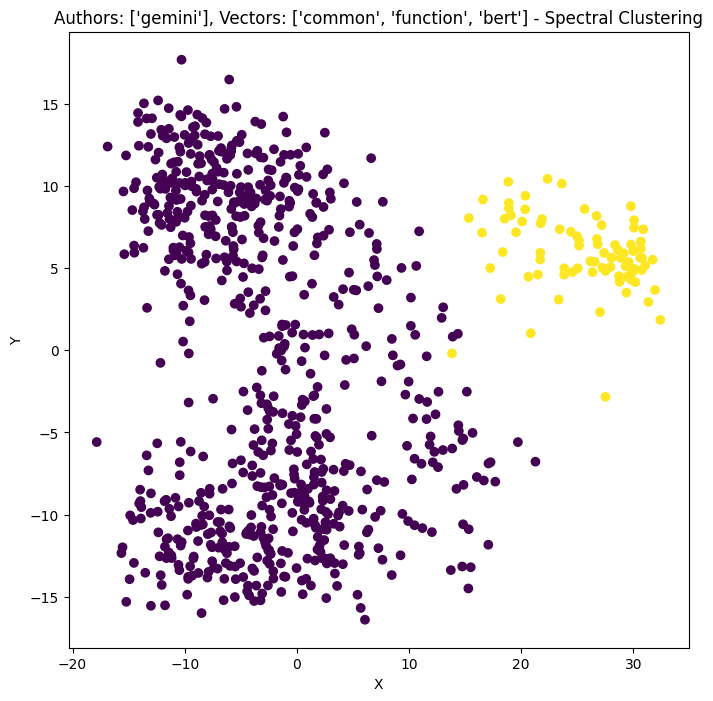

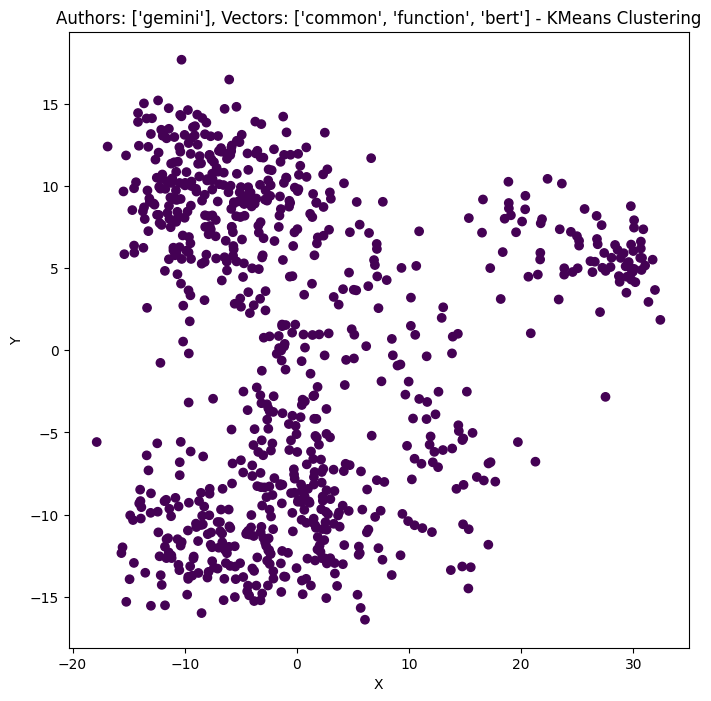

In [17]:
for vector_names in list_of_vector_names:
    cluster_graph(["gemini"], vector_names)
    print("\n")

# GPT (temp 1.0) vs. Bard

In [ ]:
for vector_names in list_of_vector_names:
    cluster_graph(["bard", "gpt"], vector_names)
    print("\n")

# GPT (temp 1.0) vs. Bard vs. Reddit

In [ ]:
for vector_names in list_of_vector_names:
    cluster_graph(["bard", "gpt", "reddit"], vector_names)
    print("\n")

# Reddit vs. GPT various temps

In [ ]:
temps = ["0.1", "0.2", "0.3", "0.4", "0.5", "0.6", "0.7", "0.8",
         "0.9", "1.0", "1.1", "1.2", "1.3", "1.4", "1.5"]

In [ ]:
Kmeans_ari_list = []
Spectral_ari_list = []
for vector_names in list_of_vector_names:
    vector_Kmeans = []
    vector_Spectral = []
    for temp in temps:
        Kmeans_ari, Kmeans_ri, Spectral_ari, Spectral_ri = cluster(["reddit", temp], vector_names)
        vector_Kmeans.append(Kmeans_ari)
        vector_Spectral.append(Spectral_ari)
        #print(f"{vector_names} scores:\n Kmeans_ari: {Kmeans_ari}, Kmeans_ri: {Kmeans_ri}, Spectral_ari: {Spectral_ari}, Spectral_ri: {Spectral_ri},")
    Kmeans_ari_list.append(vector_Kmeans)
    Spectral_ari_list.append(vector_Spectral)

In [ ]:
Kmeans_df = pd.DataFrame(Kmeans_ari_list)
Kmeans_df.columns = temps
index = [str(name) for name in list_of_vector_names]
Kmeans_df.index = index

Kmeans_df.T.plot(kind='line', marker='o')
plt.xlabel('Temp')
plt.ylabel('Kmeans Adjusted Rand Index')
plt.title('Kmeans Adjusted Rand Index vs. Temp by Vector')
plt.legend(title='Vectors')
plt.grid(True)
plt.show()

In [ ]:
Spectral_df = pd.DataFrame(Spectral_ari_list)
Spectral_df.columns = temps
index = [str(name) for name in list_of_vector_names]
Spectral_df.index = index

Spectral_df.T.plot(kind='line', marker='o')
plt.xlabel('Temp')
plt.ylabel('Spectral Adjusted Rand Index')
plt.title('Spectral Adjusted Rand Index vs. Temp by Vector')
plt.legend(title='Vectors')
plt.grid(True)
plt.show()